In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from sklearn.model_selection import train_test_split
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.metrics import roc_auc_score
import os
os.chdir('C:/Users/kriti/OneDrive/Desktop/MoneyLaunderingProject/Code')

In [31]:
#Read Summarized Files	
SummarizedNormal = pd.read_csv('SummarizedData_N.csv')
SummarizedShell =  pd.read_csv('SummarizedData_S.csv')
SummarizedData = SummarizedNormal.append(SummarizedShell)

In [32]:
# creating a dict file  
Company = {'S': 1,'N': 0} 
SummarizedData.Flag = [Company[item] for item in SummarizedData.Flag] 

In [33]:
##Checking Null values
SummarizedData.isnull().sum().max()

0

In [34]:
SummarizedNormal.fillna( method ='ffill', inplace = True)
SummarizedShell.fillna( method ='ffill', inplace = True) 
SummarizedData.fillna( method ='ffill', inplace = True) 

In [35]:
##Checking Null values
SummarizedData.isnull().sum().max()

0

Honest Companies 95.0 % of the dataset
Shell Companies 5.0 % of the dataset


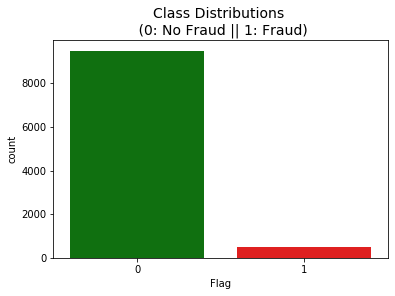

In [7]:
##Check Proportion of shell and normal Company
print('Honest Companies', round(SummarizedData['Flag'].value_counts()[0]/len(SummarizedData) * 100,2), '% of the dataset')
print('Shell Companies', round(SummarizedData['Flag'].value_counts()[1]/len(SummarizedData) * 100,2), '% of the dataset')
colors = ["g", "r"]
##Plot graph
sns.countplot('Flag', data=SummarizedData, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.savefig('C:/Users/kbaja4/AppData/Local/Programs/Python/Python36/Scripts/Output/Proportion.png')

In [8]:
##Drop Account Number
SummarizedData = SummarizedData.drop(['AccountNumber'],axis=1)

In [9]:
##Read Multiple files and combine files
CompanyDataN = pd.read_csv('CompanyData_N.csv')
CompanyDataS = pd.read_csv('CompanyData_S.csv')
CompanyData = CompanyDataN.append(CompanyDataS)
TransactionDataN = pd.read_csv('TransactionData_N.csv')
TransactionDataS = pd.read_csv('TransactionData_S.csv')
TransactionData = TransactionDataN.append(TransactionDataS)
IncomingN = TransactionDataN[TransactionDataN.TransactionCategory == "Credit"]
IncomingS = TransactionDataS[TransactionDataS.TransactionCategory == "Credit"]
OutgoingN = TransactionDataN[TransactionDataN.TransactionCategory == "Debit"]
Outgoing = TransactionDataS[TransactionDataS.TransactionCategory == "Debit"]

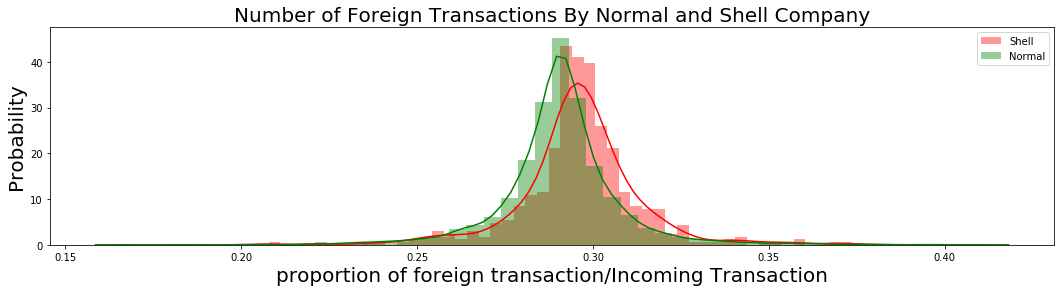

In [10]:
##(a) First Variable -- Foreign Transactions
fig, ax = plt.subplots(1, 1, figsize=(18,4))
ForeignNormal = SummarizedNormal['Foreign'].values
ForeignShell = SummarizedShell['Foreign'].values
sns.distplot(ForeignShell,color='r',label = "Shell")
sns.distplot(ForeignNormal,color = 'g',label = "Normal")
plt.title('Number of Foreign Transactions By Normal and Shell Company',fontsize = 20)
plt.xlabel('proportion of foreign transaction/Incoming Transaction',fontsize = 20)
plt.ylabel('Probability',fontsize = 20)
plt.legend()
plt.savefig('C:/Users/kbaja4/AppData/Local/Programs/Python/Python36/Scripts/Output/Foreign.png')

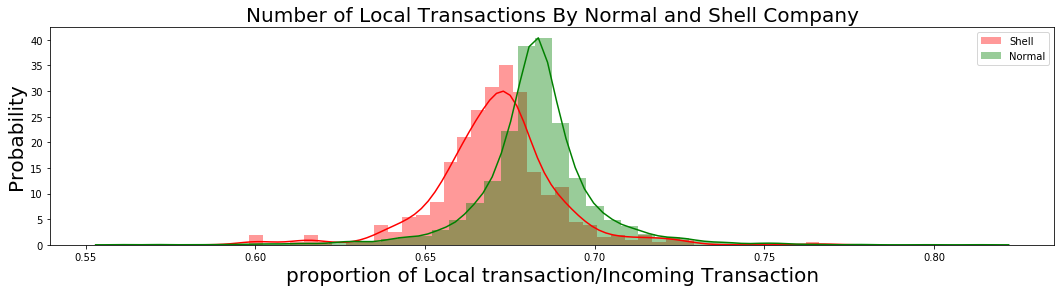

In [11]:
##(b) Second Variable -- Local Transactions
fig, ax = plt.subplots(1, 1, figsize=(18,4))
LocalNormal = SummarizedNormal['Local'].values
LocalShell = SummarizedShell['Local'].values
sns.distplot(LocalShell,color='r',label = "Shell")
sns.distplot(LocalNormal,color = 'g',label = "Normal")
plt.title('Number of Local Transactions By Normal and Shell Company',fontsize = 20)
plt.xlabel('proportion of Local transaction/Incoming Transaction',fontsize = 20)
plt.ylabel('Probability',fontsize = 20)
plt.legend()
plt.savefig('C:/Users/kbaja4/AppData/Local/Programs/Python/Python36/Scripts/Output/Local.png')

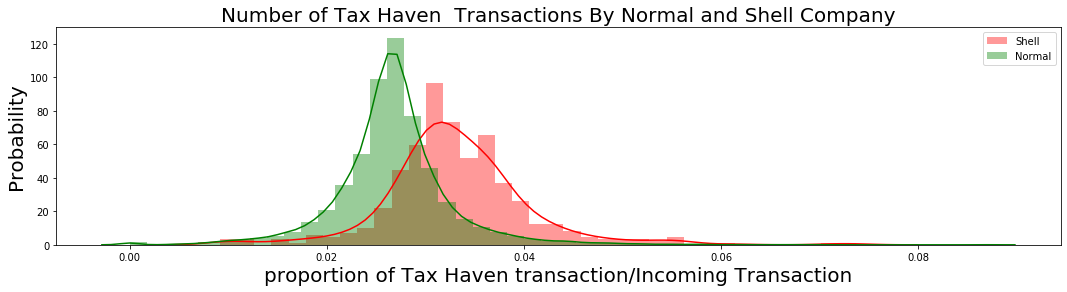

In [12]:
##(c) Tax Haven Transactions
fig, ax = plt.subplots(1, 1, figsize=(18,4))
TaxHavenNormal = SummarizedNormal['TaxHaven'].values
TaxHavenShell = SummarizedShell['TaxHaven'].values
sns.distplot(TaxHavenShell,color='r',label = "Shell")
sns.distplot(TaxHavenNormal,color = 'g',label = "Normal")
plt.title('Number of Tax Haven  Transactions By Normal and Shell Company',fontsize = 20)
plt.xlabel('proportion of Tax Haven transaction/Incoming Transaction',fontsize = 20)
plt.ylabel('Probability',fontsize = 20)
plt.legend()
plt.savefig('C:/Users/kbaja4/AppData/Local/Programs/Python/Python36/Scripts/Output/TaxHaven.png')

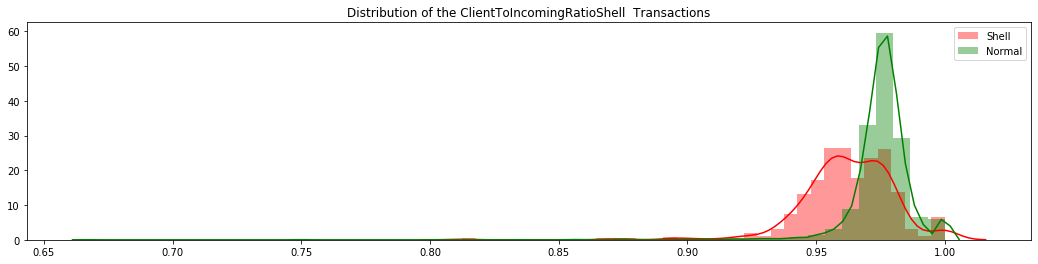

In [13]:
##(d) Client to Incoming Transaction Ratio
fig, ax = plt.subplots(1, 1, figsize=(18,4))
ClientToIncomingRatioNormal = SummarizedNormal['ClientToIncomingRatio'].values
ClientToIncomingRatioShell = SummarizedShell['ClientToIncomingRatio'].values
sns.distplot(ClientToIncomingRatioShell,color='r',label = "Shell")
sns.distplot(ClientToIncomingRatioNormal,color = 'g',label = "Normal")
plt.title('Distribution of the ClientToIncomingRatioShell  Transactions')
plt.legend()
plt.savefig('C:/Users/kbaja4/AppData/Local/Programs/Python/Python36/Scripts/Output/ClientToIncomingTransaction.png')

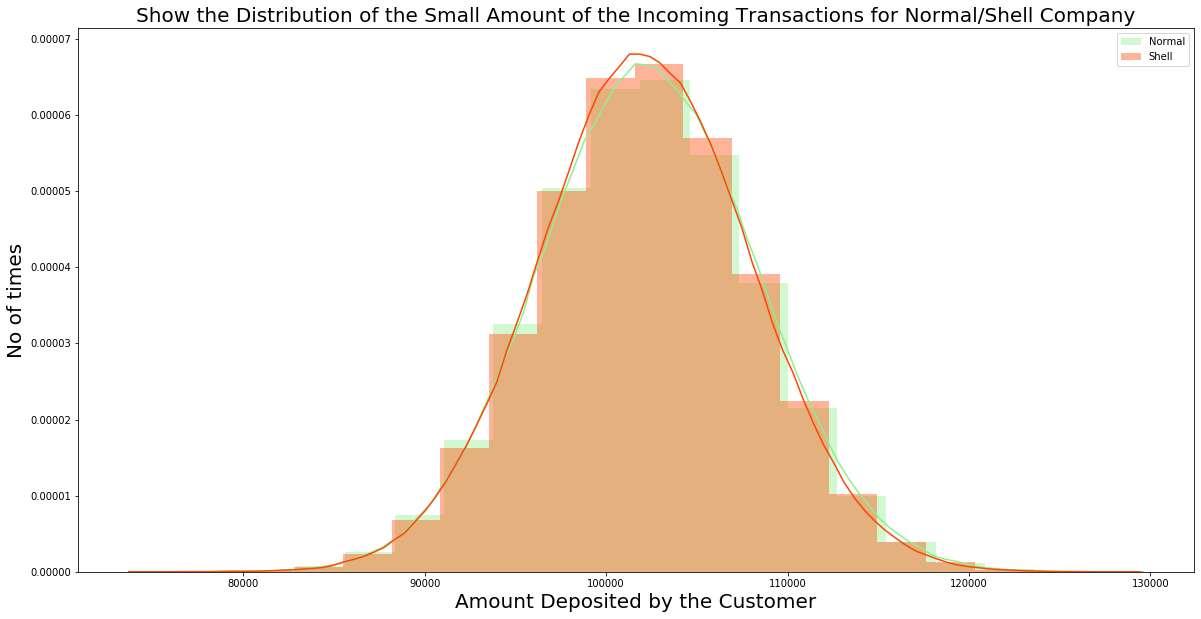

In [14]:
##(e,f) Proportion of Small and Large Amount of the Transactions
plt.figure(figsize=(20,10))
sns.distplot(IncomingN.TransactionAmount, bins=20,label = "Normal",color = "lightgreen")
sns.distplot(IncomingS.TransactionAmount, bins=20,label = "Shell",color = "orangered")
plt.xlabel('Amount Deposited by the Customer',fontsize=20)
plt.ylabel('No of times',fontsize=20)
plt.legend()
plt.title('Show the Distribution of the Small Amount of the Incoming Transactions for Normal/Shell Company',fontsize=20)
plt.savefig('C:/Users/kbaja4/AppData/Local/Programs/Python/Python36/Scripts/Output/SmallAndLargeAmount.png')

In [15]:
##(g) Proportion of Saving Account
print('Honest Companies Saving Account', round(SummarizedNormal['TypeAccount'].value_counts()[0]/len(SummarizedNormal) * 100,2), '% of the dataset')
print('Shell Companies saving Account', round(SummarizedShell['TypeAccount'].value_counts()[0]/len(SummarizedShell) * 100,2), '% of the dataset')
##(h) Proportion of Current Account
print('Honest Companies Current  Account', round(SummarizedNormal['TypeAccount'].value_counts()[1]/len(SummarizedNormal) * 100,2), '% of the dataset')
print('Shell Companies Current Account', round(SummarizedShell['TypeAccount'].value_counts()[1]/len(SummarizedShell) * 100,2), '% of the dataset')

Honest Companies Saving Account 96.82 % of the dataset
Shell Companies saving Account 88.0 % of the dataset
Honest Companies Saving Account 3.18 % of the dataset
Shell Companies saving Account 12.0 % of the dataset


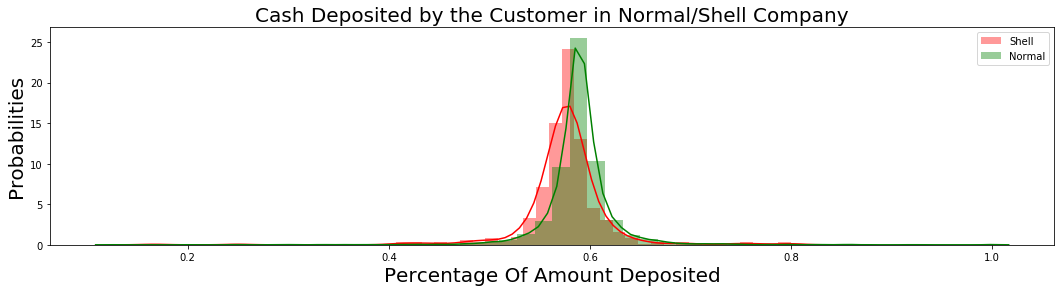

In [16]:
##(i) Proportion of Cash Transactions
fig, ax = plt.subplots(1, 1, figsize=(18,4))
IncomingCashTransactiontNormal = SummarizedNormal['IncomingCashTransaction'].values
IncomingCashTransactionShell = SummarizedShell['IncomingCashTransaction'].values
sns.distplot(IncomingCashTransactionShell,color='r',label = "Shell")
sns.distplot(IncomingCashTransactiontNormal,color = 'g',label = "Normal")
plt.title('Cash Deposited by the Customer in Normal/Shell Company',fontsize = 20)
plt.xlabel('Percentage Of Amount Deposited',fontsize = 20)
plt.ylabel('Probabilities',fontsize = 20)
plt.savefig('C:/Users/kbaja4/AppData/Local/Programs/Python/Python36/Scripts/Output/CashTransactions.png')
plt.legend()

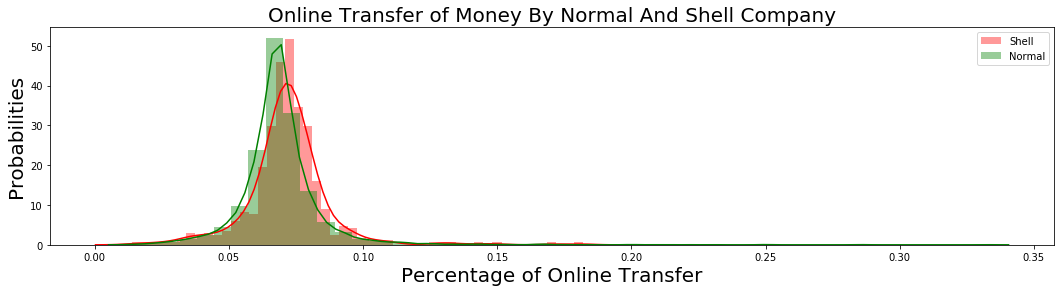

In [17]:
##(j)Proportion of Online Transaction
SummarizedShell['IncomingOnlineTransaction'] = pd.to_numeric(SummarizedShell['IncomingOnlineTransaction'], errors='coerce')
fig, ax = plt.subplots(1, 1, figsize=(18,4))
IncomingOnlineTransactionNormal = SummarizedNormal['IncomingOnlineTransaction'].values
IncomingOnlineTransactionShell = SummarizedShell['IncomingOnlineTransaction'].values
sns.distplot(IncomingOnlineTransactionShell,color='r',label = "Shell")
sns.distplot(IncomingOnlineTransactionNormal,color = 'g',label = "Normal")
plt.title('Online Transfer of Money By Normal And Shell Company',fontsize = 20)
plt.xlabel('Percentage of Online Transfer',fontsize=20)
plt.ylabel('Probabilities',fontsize=20)
plt.legend()
plt.savefig('C:/Users/kbaja4/AppData/Local/Programs/Python/Python36/Scripts/Output/OnlineTransactions.png')
plt.legend()

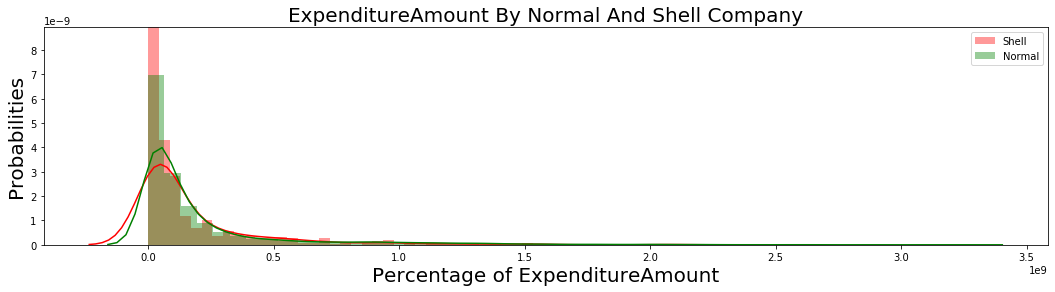

In [18]:
##(k)Proportion of Annual Expenditure
fig, ax = plt.subplots(1, 1, figsize=(18,4))
ExpenditureAmountNormal = CompanyDataN['ExpenditureAmount'].values
ExpenditureAmountShell = CompanyDataS['ExpenditureAmount'].values
sns.distplot(ExpenditureAmountShell,color='r',label = "Shell")
sns.distplot(ExpenditureAmountNormal,color = 'g',label = "Normal")
plt.title('ExpenditureAmount By Normal And Shell Company',fontsize = 20)
plt.xlabel('Percentage of ExpenditureAmount',fontsize=20)
plt.ylabel('Probabilities',fontsize=20)
plt.legend()
plt.savefig('C:/Users/kbaja4/AppData/Local/Programs/Python/Python36/Scripts/Output/ExpenditureAmount.png')
plt.legend()

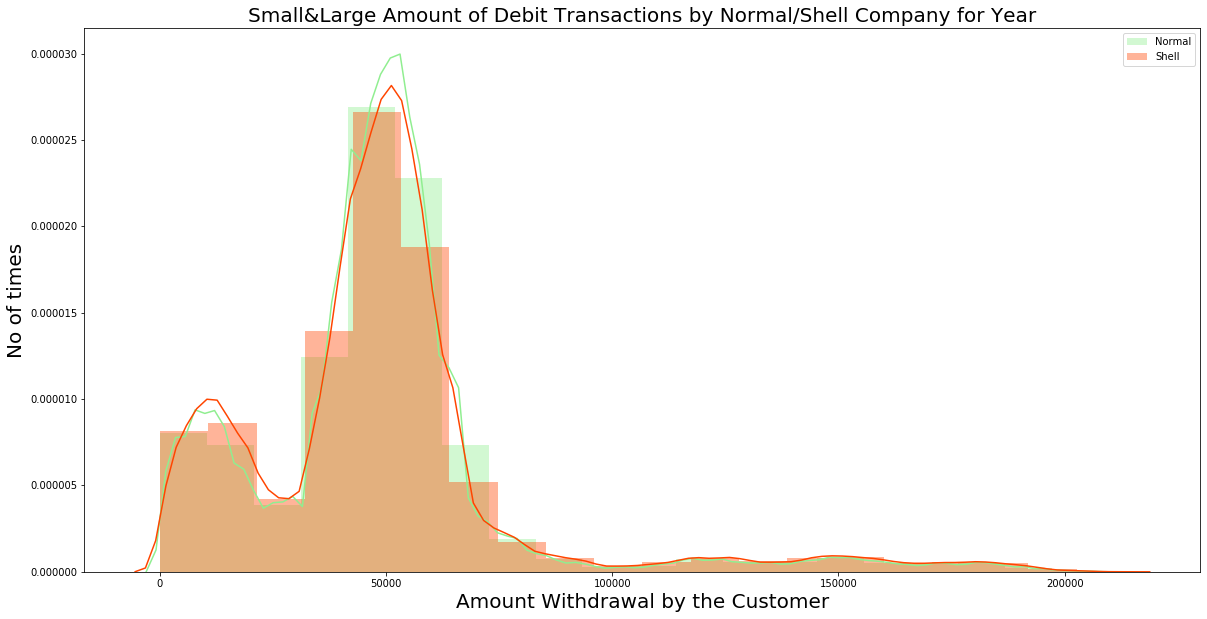

In [19]:
##(L & M) Small and Large Amount of Outgoing Transaction
##(e,f) Proportion of Small and Large Amount of the OutgoingTransactions
plt.figure(figsize=(20,10))
sns.distplot(OutgoingN.TransactionAmount, bins=20,label = "Normal",color = "lightgreen")
sns.distplot(Outgoing.TransactionAmount, bins=20,label = "Shell",color = "orangered")
plt.xlabel('Amount Withdrawal by the Customer',fontsize=20)
plt.ylabel('No of times',fontsize=20)
plt.legend()
plt.title('Small&Large Amount of Debit Transactions by Normal/Shell Company for Year',fontsize=20)
plt.savefig('C:/Users/kbaja4/AppData/Local/Programs/Python/Python36/Scripts/Output/SmallAndLargeAmountOutgoing.png')

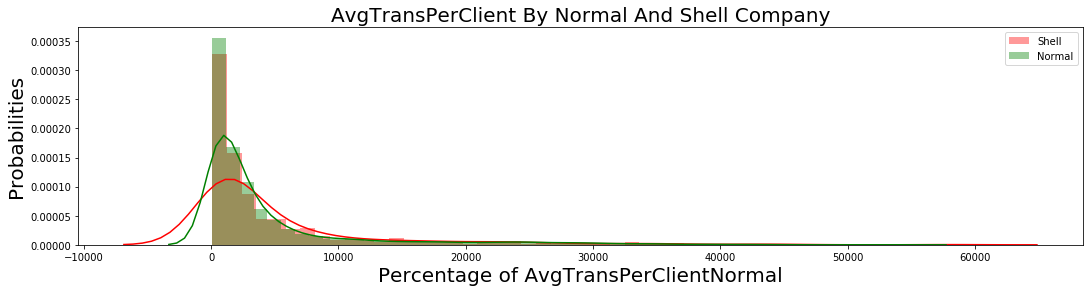

In [20]:
##(0) Average Transaction Per Client 
fig, ax = plt.subplots(1, 1, figsize=(18,4))
AvgTransPerClientNormal = SummarizedNormal['AvgTransPerClient'].values
AvgTransPerClientShell = SummarizedShell['AvgTransPerClient'].values
sns.distplot(AvgTransPerClientShell,color='r',label = "Shell")
sns.distplot(AvgTransPerClientNormal,color = 'g',label = "Normal")
plt.title('AvgTransPerClient By Normal And Shell Company',fontsize = 20)
plt.xlabel('Percentage of AvgTransPerClientNormal',fontsize=20)
plt.ylabel('Probabilities',fontsize=20)
plt.legend()
plt.savefig('C:/Users/kbaja4/AppData/Local/Programs/Python/Python36/Scripts/Output/AvgTransPerClient.png')

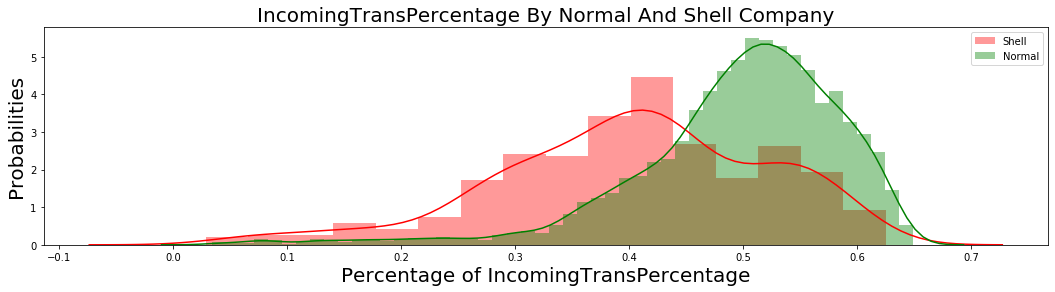

In [21]:
##(P)Incoming Transaction Percentage
fig, ax = plt.subplots(1, 1, figsize=(18,4))
AvgTransPerClientNormal = SummarizedNormal['IncomingTransPercentage'].values
AvgTransPerClientShell = SummarizedShell['IncomingTransPercentage'].values
sns.distplot(AvgTransPerClientShell,color='r',label = "Shell")
sns.distplot(AvgTransPerClientNormal,color = 'g',label = "Normal")
plt.title('IncomingTransPercentage By Normal And Shell Company',fontsize = 20)
plt.xlabel('Percentage of IncomingTransPercentage',fontsize=20)
plt.ylabel('Probabilities',fontsize=20)
plt.legend()
plt.savefig('C:/Users/kbaja4/AppData/Local/Programs/Python/Python36/Scripts/Output/AvgTransPerClient.png')

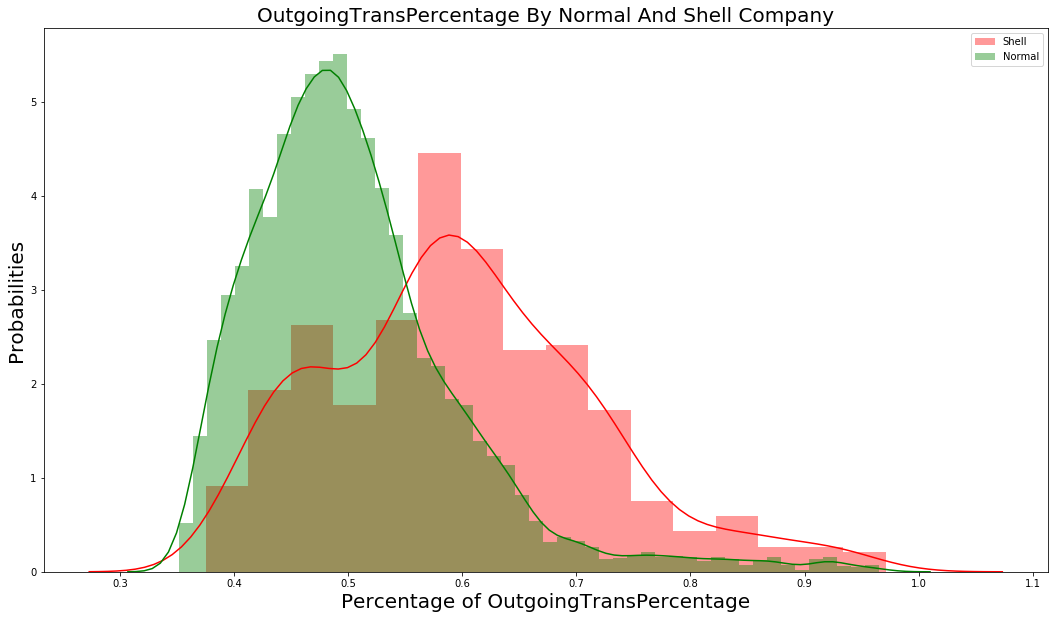

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(18,10))
OutgoingTransPercentageNormal = SummarizedNormal['OutgoingTransPercentage'].values
OutgoingTransPercentageShell = SummarizedShell['OutgoingTransPercentage'].values
sns.distplot(OutgoingTransPercentageShell,color='r',label = "Shell")
sns.distplot(OutgoingTransPercentageNormal,color = 'g',label = "Normal")
plt.title('OutgoingTransPercentage By Normal And Shell Company',fontsize = 20)
plt.xlabel('Percentage of OutgoingTransPercentage',fontsize=20)
plt.ylabel('Probabilities',fontsize=20)
plt.legend()
plt.savefig('C:/Users/kbaja4/AppData/Local/Programs/Python/Python36/Scripts/Output/OutgoingTransPercentage.png')
plt.legend()

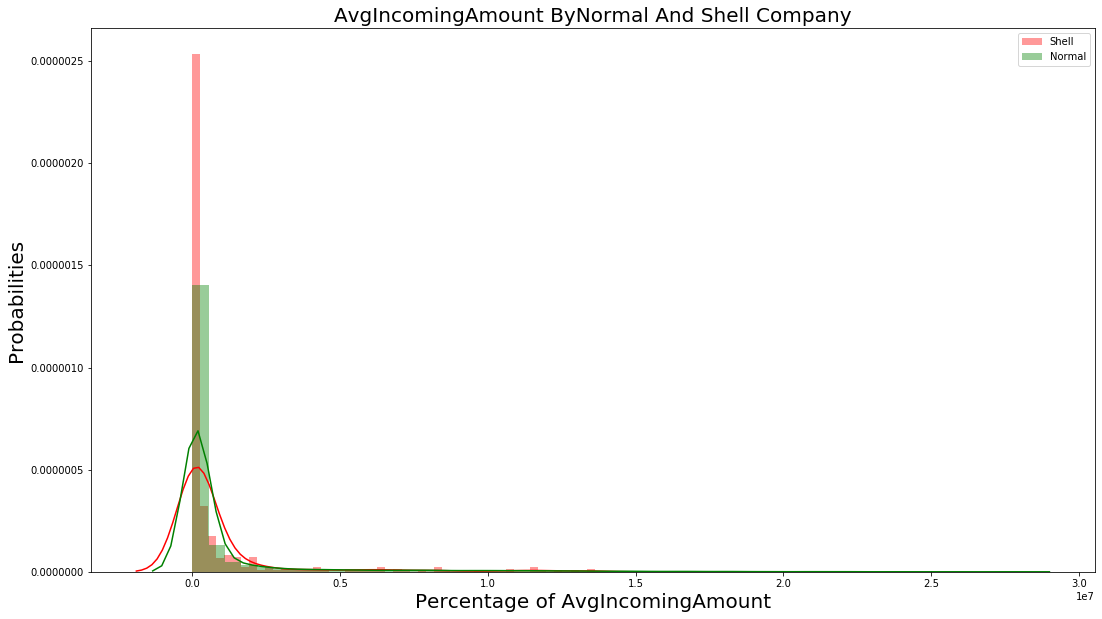

In [23]:
##(R) Average Incoming Transaction Amount(Montly)
fig, ax = plt.subplots(1, 1, figsize=(18,10))
AvgIncomingAmountNormal = SummarizedNormal['AvgIncomingAmount'].values
AvgIncomingAmountShell = SummarizedShell['AvgIncomingAmount'].values
sns.distplot(AvgIncomingAmountShell,color='r',label = "Shell")
sns.distplot(AvgIncomingAmountNormal,color = 'g',label = "Normal")
plt.title('AvgIncomingAmount ByNormal And Shell Company',fontsize = 20)
plt.xlabel('Percentage of AvgIncomingAmount',fontsize=20)
plt.ylabel('Probabilities',fontsize=20)
plt.legend()
plt.savefig('C:/Users/kbaja4/AppData/Local/Programs/Python/Python36/Scripts/Output/AvgIncomingAmount.png')

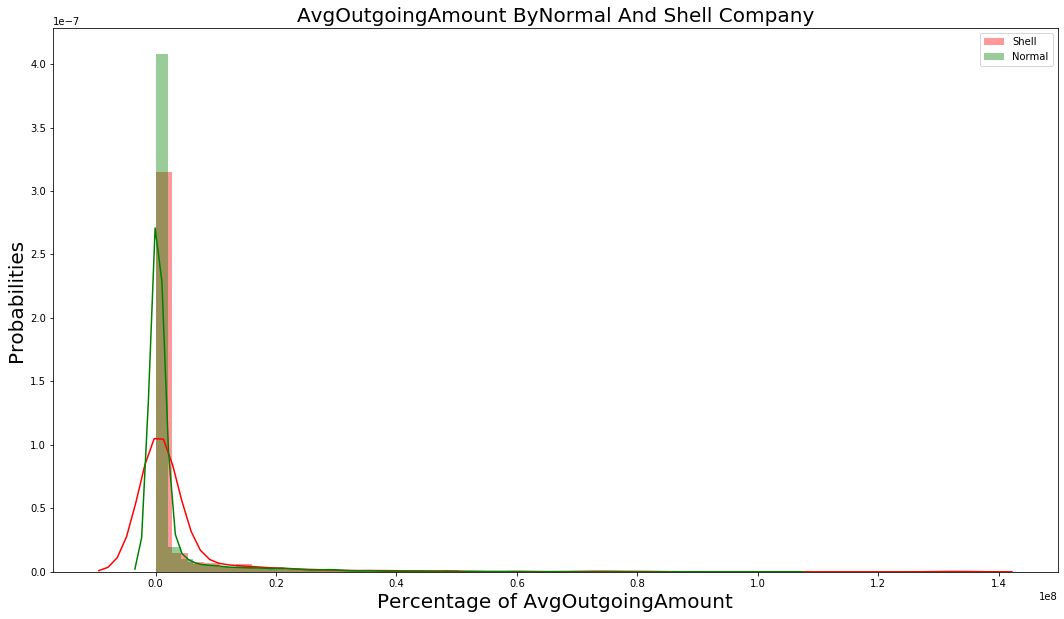

In [24]:
##(S) Average Outgoing Transaction Amount(Montly)
fig, ax = plt.subplots(1, 1, figsize=(18,10))
AvgOutgoingAmountNormal = SummarizedNormal['AvgOutgoingAmount'].values
AvgOutgoingAmountShell = SummarizedShell['AvgOutgoingAmount'].values
sns.distplot(AvgOutgoingAmountShell,color='r',label = "Shell")
sns.distplot(AvgOutgoingAmountNormal,color = 'g',label = "Normal")
plt.title('AvgOutgoingAmount ByNormal And Shell Company',fontsize = 20)
plt.xlabel('Percentage of AvgOutgoingAmount',fontsize=20)
plt.ylabel('Probabilities',fontsize=20)
plt.legend()
plt.savefig('C:/Users/kbaja4/AppData/Local/Programs/Python/Python36/Scripts/Output/AvgOutgoingAmount.png')

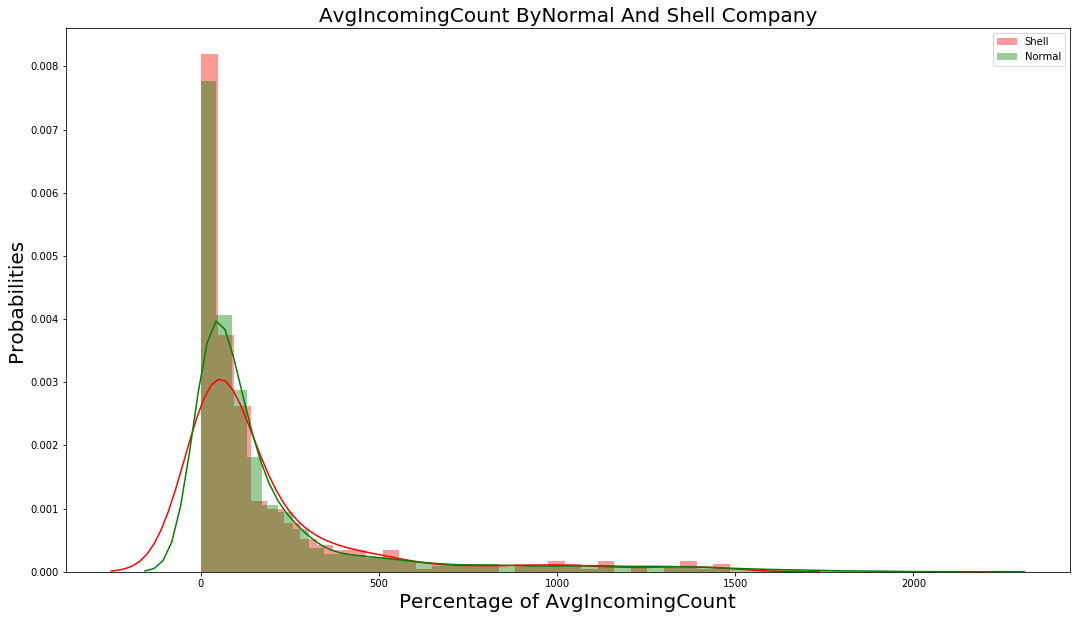

In [25]:
##(U) Average Number of Incoming Transaction(Montly)
fig, ax = plt.subplots(1, 1, figsize=(18,10))
AvgIncomingCountNormal = SummarizedNormal['AvgIncomingCount'].values
AvgIncomingCountShell = SummarizedShell['AvgIncomingCount'].values
sns.distplot(AvgIncomingCountShell,color='r',label = "Shell")
sns.distplot(AvgIncomingCountNormal,color = 'g',label = "Normal")
plt.title('AvgIncomingCount ByNormal And Shell Company',fontsize = 20)
plt.xlabel('Percentage of AvgIncomingCount',fontsize=20)
plt.ylabel('Probabilities',fontsize=20)
plt.legend()
plt.savefig('C:/Users/kbaja4/AppData/Local/Programs/Python/Python36/Scripts/Output/AvgIncomingCount.png')

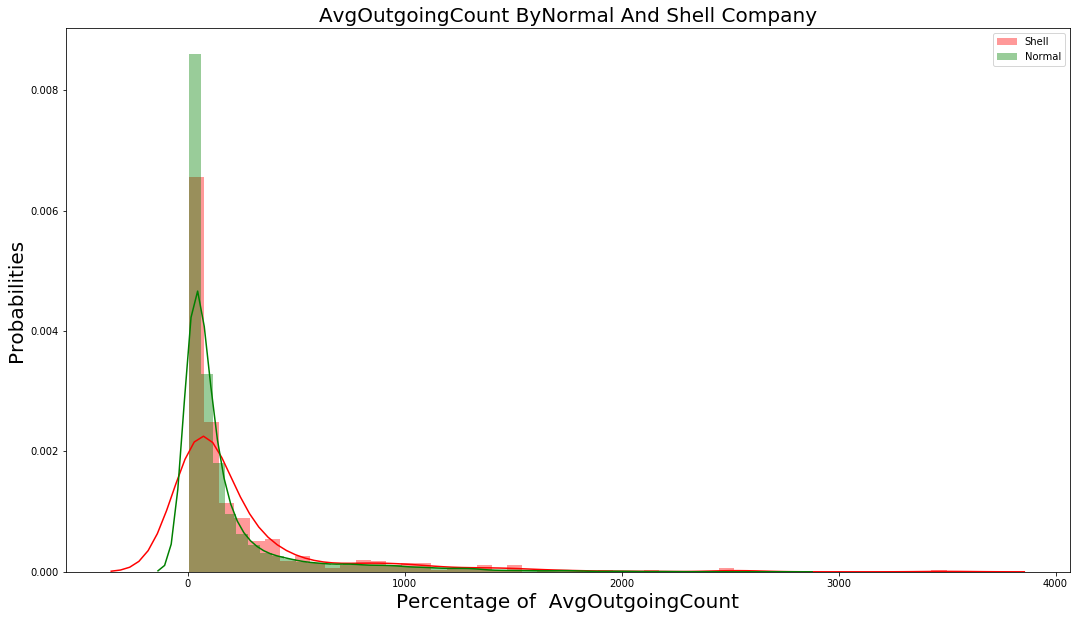

In [26]:
##(T) Average Number of Outgoing Transaction(Montly)
fig, ax = plt.subplots(1, 1, figsize=(18,10))
AvgOutgoingCountNormal = SummarizedNormal['AvgOutgoingCount'].values
AvgOutgoingCountShell = SummarizedShell['AvgOutgoingCount'].values
sns.distplot(AvgOutgoingCountShell,color='r',label = "Shell")
sns.distplot(AvgOutgoingCountNormal,color = 'g',label = "Normal")
plt.title('AvgOutgoingCount ByNormal And Shell Company',fontsize = 20)
plt.xlabel('Percentage of  AvgOutgoingCount',fontsize=20)
plt.ylabel('Probabilities',fontsize=20)
plt.legend()
plt.savefig('C:/Users/kbaja4/AppData/Local/Programs/Python/Python36/Scripts/Output/AvgOutgoingCount.png')

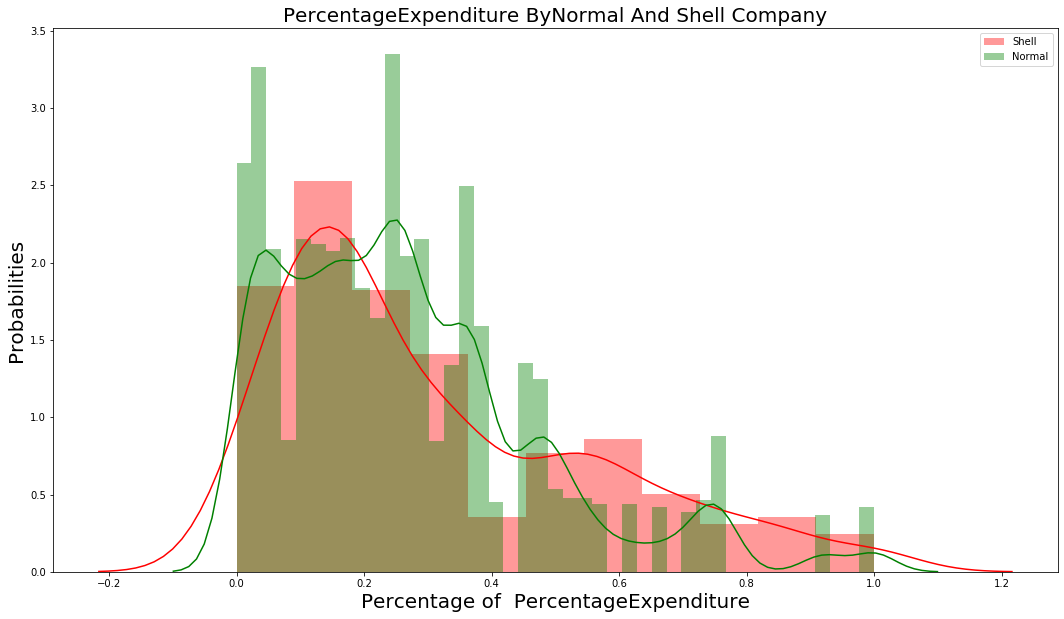

In [27]:
##(U)Percentage of Expenditure
fig, ax = plt.subplots(1, 1, figsize=(18,10))
PercentageExpenditureNormal = SummarizedNormal['PercentageExpenditure'].values
PercentageExpenditureShell = SummarizedShell['PercentageExpenditure'].values
sns.distplot(PercentageExpenditureShell,color='r',label = "Shell")
sns.distplot(PercentageExpenditureNormal,color = 'g',label = "Normal")
plt.title('PercentageExpenditure ByNormal And Shell Company',fontsize = 20)
plt.xlabel('Percentage of  PercentageExpenditure',fontsize=20)
plt.ylabel('Probabilities',fontsize=20)
plt.legend()
plt.savefig('C:/Users/kbaja4/AppData/Local/Programs/Python/Python36/Scripts/Output/PercentageExpenditure.png')

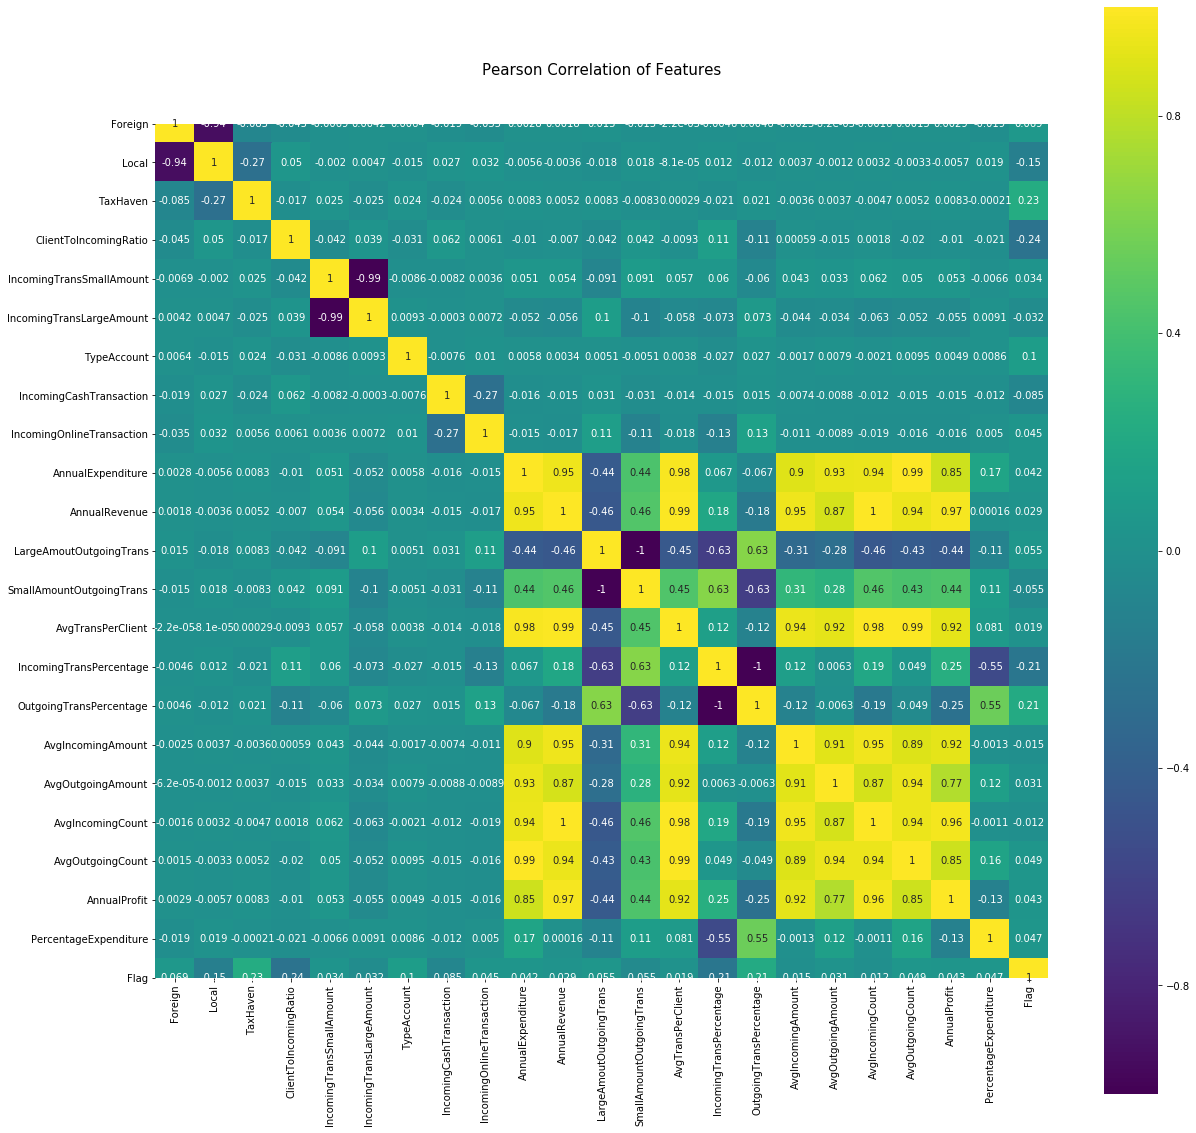

In [28]:
##Pearson Correlation
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(SummarizedData.astype(float).corr(),linewidths=0,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig('C:/Users/kbaja4/AppData/Local/Programs/Python/Python36/Scripts/Output/CorrelationMatrix.png')

In [29]:
CorrelationTartgetValue = SummarizedData[SummarizedData.columns[1:]].corr()['Flag'][:].sort_values(ascending = False)

In [30]:
CorrelationTartgetValue

Flag                         1.000000
TaxHaven                     0.230517
OutgoingTransPercentage      0.212028
TypeAccount                  0.102925
LargeAmoutOutgoingTrans      0.054600
AvgOutgoingCount             0.048820
PercentageExpenditure        0.047361
IncomingOnlineTransaction    0.044539
AnnualProfit                 0.042918
AnnualExpenditure            0.042467
IncomingTransSmallAmount     0.033502
AvgOutgoingAmount            0.030690
AnnualRevenue                0.028989
AvgTransPerClient            0.018757
AvgIncomingCount            -0.012414
AvgIncomingAmount           -0.014531
IncomingTransLargeAmount    -0.031569
SmallAmountOutgoingTrans    -0.054600
IncomingCashTransaction     -0.084824
Local                       -0.147975
IncomingTransPercentage     -0.212028
ClientToIncomingRatio       -0.236338
Name: Flag, dtype: float64

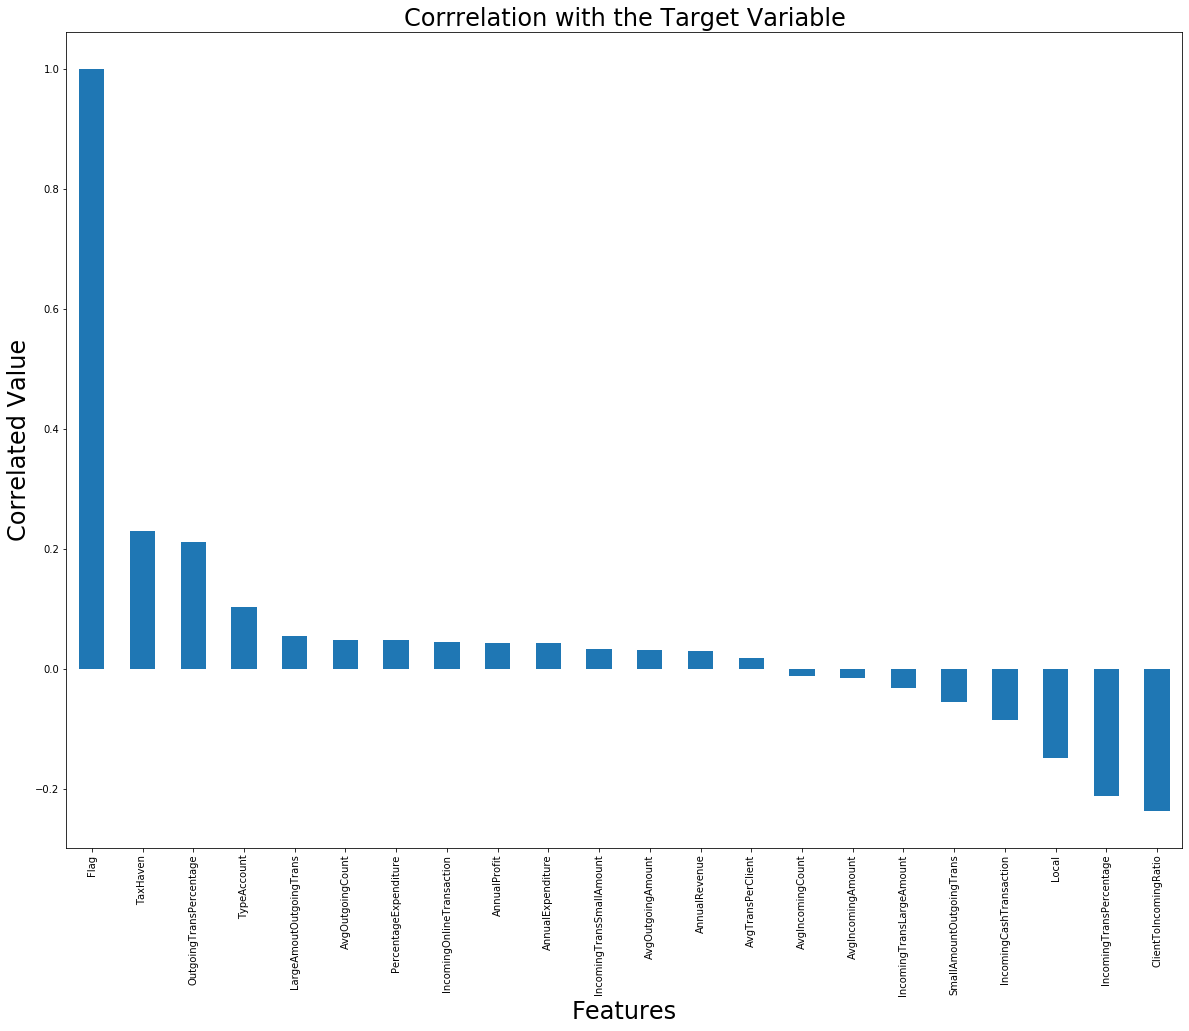

In [31]:
plt.figure(figsize=(20,15))
#CorrelationTartgetValue = CorrelationTartgetValue.drop(['Flag'])
CorrelationTartgetValue.plot(x ='Country', y='GDP_Per_Capita', kind = 'bar')
plt.title('Corrrelation with the Target Variable',fontsize = 24)
plt.xlabel('Features',fontsize = 24)
plt.ylabel('Correlated Value',fontsize = 24)
plt.savefig('C:/Users/kbaja4/AppData/Local/Programs/Python/Python36/Scripts/Output/CorrelationWithFlagVariable.png')

In [126]:
#X = SummarizedData.iloc[:, SummarizedData.columns != 'Flag']
X = SummarizedData[['AvgIncomingCount','AvgIncomingAmount','IncomingTransLargeAmount','SmallAmountOutgoingTrans','IncomingCashTransaction','Local','IncomingTransPercentage','ClientToIncomingRatio','OutgoingTransPercentage','TaxHaven']]
Y = SummarizedData.iloc[:, SummarizedData.columns == 'Flag']

In [127]:
# Whole dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  7000
Number transactions test dataset:  3000
Total number of transactions:  10000


In [128]:
from sklearn import tree
import graphviz

In [129]:
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score
from sklearn.model_selection import GridSearchCV


best_clf = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split = 2,max_depth = 7,min_samples_leaf = 1,min_weight_fraction_leaf = 0)

#parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)},{'min_samples_split': (0.1,0.2,0.3,0.4,0.5)},{'min_samples_leaf': (1,2,3,4,5,6,7)},{'min_weight_fraction_leaf': (0.0,0.1,0.2)}
#scorer = make_scorer(fbeta_score,beta=1.5)

#grid_obj = GridSearchCV(clf, param_grid = parameters, scoring=scorer)
grid_fit = best_clf.fit(X_train,Y_train)

#best_clf = grid_fit.best_estimator_
#print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(X_test)

TrainPred = best_clf.predict(X_train)


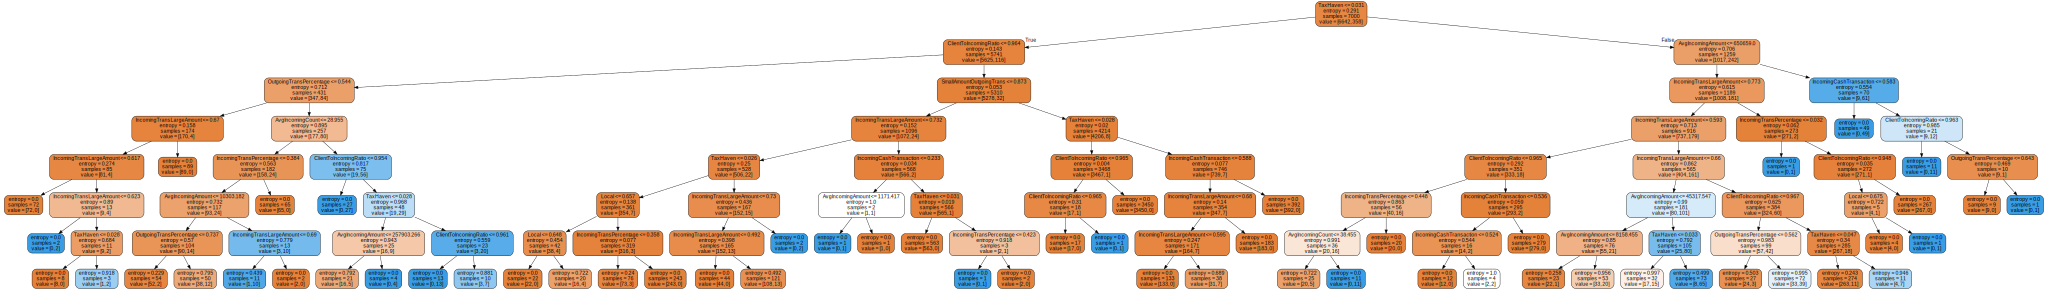

In [130]:

os.environ["PATH"] += os.pathsep + r'C:\Users\kbaja4\AppData\Local\Programs\Python\Python36\graphviz-2.38\release\bin'
dot_data = tree.export_graphviz(best_clf, out_file=None, max_depth=10, feature_names=list(X_train.columns.values), filled=True, rounded=True)
valgTre = graphviz.Source(dot_data) 
png_bytes = valgTre.pipe(format='png')
with open('DecisionTree_Classifier.png','wb') as f:
    f.write(png_bytes)

#from IPython.display import Image
#Image(png_bytes)
valgTre

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 0.9781
Final F-score on the testing data: 0.7463
precision_score 0.8360655737704918
recall_score 0.7122905027932961
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9687
Final F-score on the testing data: 0.5881
precision_score 0.7264150943396226
recall_score 0.5422535211267606
[[2829   29]
 [  65   77]]
Auc Score is :  0.7660532826067673


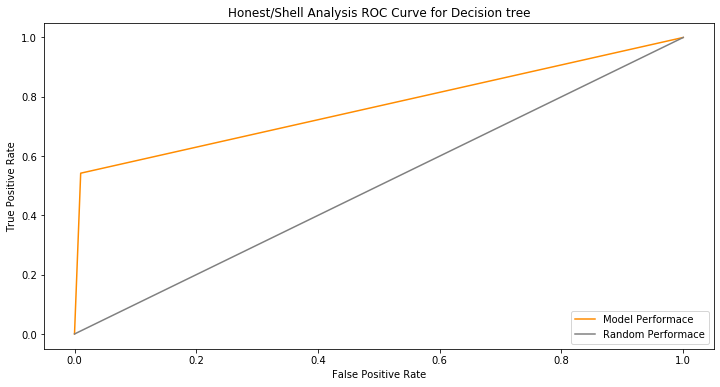

In [131]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score,f1_score
from sklearn.metrics import precision_recall_curve,fbeta_score
from sklearn.metrics import roc_curve

print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_train,TrainPred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_train,TrainPred,beta = 1.5)))
print('precision_score',precision_score(Y_train,TrainPred))
print('recall_score',recall_score(Y_train,TrainPred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_test,best_predictions,beta = 1.5)))
print('precision_score',precision_score(Y_test,best_predictions))
print('recall_score',recall_score(Y_test,best_predictions))
cm = confusion_matrix(Y_test,best_predictions,labels = [0,1])
print(cm)
fpr, tpr, thresholds = roc_curve(Y_test,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Decision tree')
plt.savefig('DecisionTreeRocCurve.png')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(Y_test,best_predictions))

In [1]:
##AdaBoostClassifiers
from sklearn.ensemble import AdaBoostClassifier
param_grid = {"base_estimator__criterion" : ["entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [7,8],"learning_rate":[1.5],
              "min_weight_fraction_leaf":[1]
             }
DTC = DecisionTreeClassifier(criterion='entropy',min_samples_split = 2,max_depth = 9,min_samples_leaf = 1,min_weight_fraction_leaf = 0)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

grid_fit = grid_search_ABC.fit(X_train,Y_train)

best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(X_test)

TrainPred = best_clf.predict(X_train)


NameError: name 'DecisionTreeClassifier' is not defined

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000
precision_score 1.0
recall_score 1.0
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9777
Final F-score on the testing data: 0.7224
precision_score 0.831858407079646
recall_score 0.6619718309859155
[[2839   19]
 [  48   94]]
Auc Score is :  0.8276619126937975


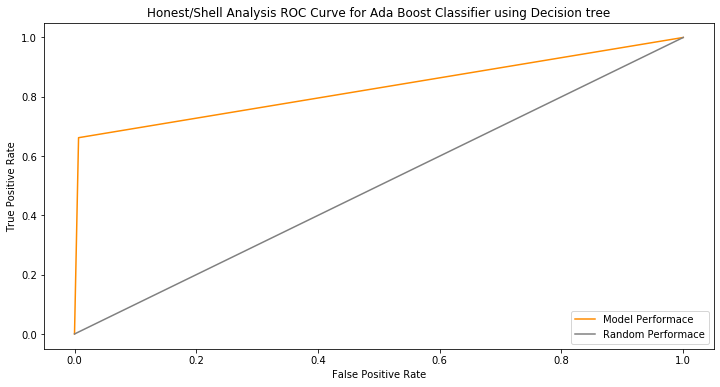

In [151]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score,f1_score
from sklearn.metrics import precision_recall_curve,fbeta_score
from sklearn.metrics import roc_curve

print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_train,TrainPred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_train,TrainPred,beta = 1.2)))
print('precision_score',precision_score(Y_train,TrainPred))
print('recall_score',recall_score(Y_train,TrainPred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_test,best_predictions,beta = 1.2)))
print('precision_score',precision_score(Y_test,best_predictions))
print('recall_score',recall_score(Y_test,best_predictions))
cm = confusion_matrix(Y_test,best_predictions,labels = [0,1])
print(cm)
fpr, tpr, thresholds = roc_curve(Y_test,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(Y_test,best_predictions))

In [241]:
import xgboost as xgb
model2 = xgb.XGBClassifier(learning_rate=1,
                           loss='exponential', max_depth=10,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=14
                           )
train_model1 = model2.fit(X_train, Y_train)
best_predictions = train_model1.predict(X_test)
TrainPred = train_model1.predict(X_train)

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000
precision_score 1.0
recall_score 1.0
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9827
Final F-score on the testing data: 0.7815
precision_score 0.8947368421052632
recall_score 0.7183098591549296
[[2846   12]
 [  40  102]]
Auc Score is :  0.8570555593885214


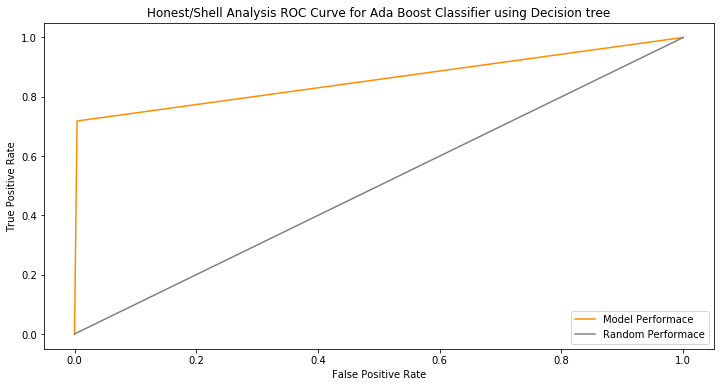

In [242]:
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_train,TrainPred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_train,TrainPred,beta = 1.2)))
print('precision_score',precision_score(Y_train,TrainPred))
print('recall_score',recall_score(Y_train,TrainPred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_test,best_predictions,beta = 1.2)))
print('precision_score',precision_score(Y_test,best_predictions))
print('recall_score',recall_score(Y_test,best_predictions))
cm = confusion_matrix(Y_test,best_predictions,labels = [0,1])
print(cm)
fpr, tpr, thresholds = roc_curve(Y_test,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(Y_test,best_predictions))

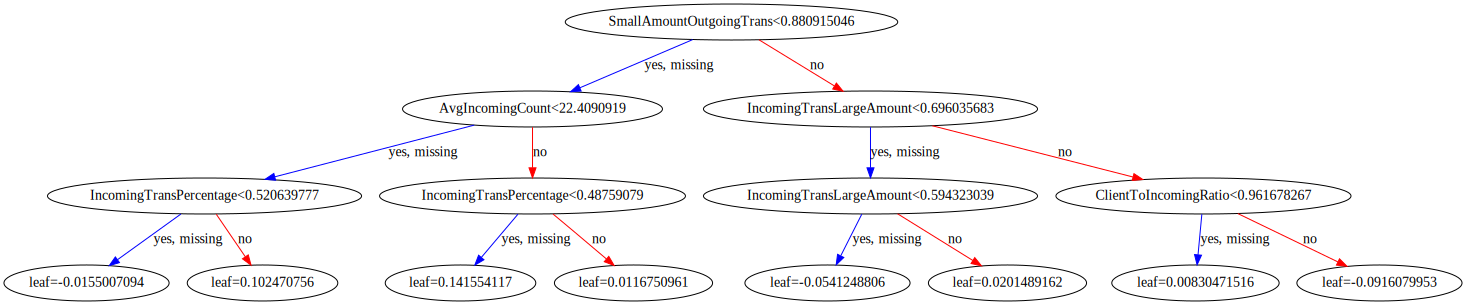

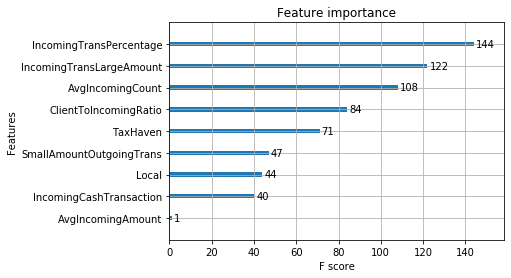

In [224]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_model.fit(X_train, Y_train, early_stopping_rounds=10,eval_set=[(X_test, Y_test)], verbose=False)

xgb.plot_importance(xgb_model)

# plot the output tree via matplotlib, specifying the ordinal number of the target tree
# xgb.plot_tree(xgb_model, num_trees=xgb_model.best_iteration)

# converts the target tree to a graphviz instance
xgb.to_graphviz(xgb_model, num_trees=xgb_model.best_iteration)

In [123]:
param_grid = { 
    'n_estimators': [5,10,20],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['entropy']
}
clf=RandomForestClassifier(random_state=42,)

In [124]:
scorer = make_scorer(fbeta_score,beta=1.5)
grid_obj = GridSearchCV(clf, param_grid = param_grid, scoring=scorer,cv = 5)
grid_fit = grid_obj.fit(X_train,Y_train)
best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(X_test)
TrainPred = best_clf.predict(X_train)


c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\kbaja4\appdata\local\programs\p

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\kbaja4\appdata\local\programs\p

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\kbaja4\appdata\local\programs\p

Best Esimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 0.9897
Final F-score on the testing data: 0.8715
precision_score 0.9965277777777778
recall_score 0.8016759776536313
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9787
Final F-score on the testing data: 0.6888
precision_score 0.9534883720930233
recall_score 0.5774647887323944
[[2854    4]
 [  60   82]]
Auc Score is :  0.7880326043032162


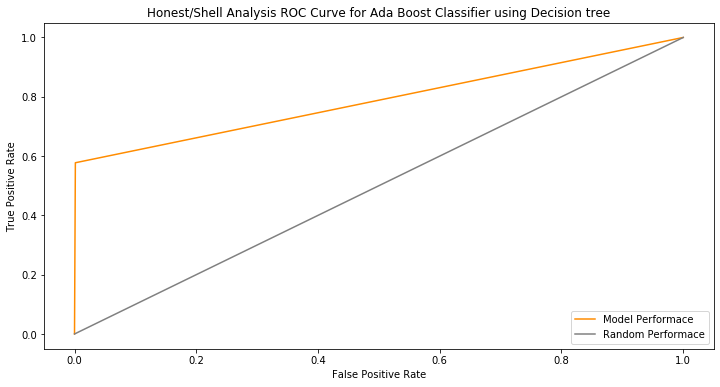

In [125]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score,f1_score
from sklearn.metrics import precision_recall_curve,fbeta_score
from sklearn.metrics import roc_curve

print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_train,TrainPred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_train,TrainPred,beta = 1.2)))
print('precision_score',precision_score(Y_train,TrainPred))
print('recall_score',recall_score(Y_train,TrainPred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_test,best_predictions,beta = 1.2)))
print('precision_score',precision_score(Y_test,best_predictions))
print('recall_score',recall_score(Y_test,best_predictions))
cm = confusion_matrix(Y_test,best_predictions,labels = [0,1])
print(cm)
fpr, tpr, thresholds = roc_curve(Y_test,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(Y_test,best_predictions))

In [100]:
m = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
m.fit(X_train, Y_train)
fi = pd.DataFrame({'feature': X_train.columns, 'importance': m.feature_importances_}).sort_values(by='importance', ascending=False)
fi = fi.reset_index()
fi

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


index                   feature  importance
0      9                  TaxHaven    0.205162
1      7     ClientToIncomingRatio    0.194106
2      2  IncomingTransLargeAmount    0.130809
3      6   IncomingTransPercentage    0.079102
4      5                     Local    0.075323
5      1         AvgIncomingAmount    0.074099
6      0          AvgIncomingCount    0.074089
7      8   OutgoingTransPercentage    0.067084
8      3  SmallAmountOutgoingTrans    0.051266
9      4   IncomingCashTransaction    0.048959

AxesSubplot(0.547727,0.125;0.352273x0.755)


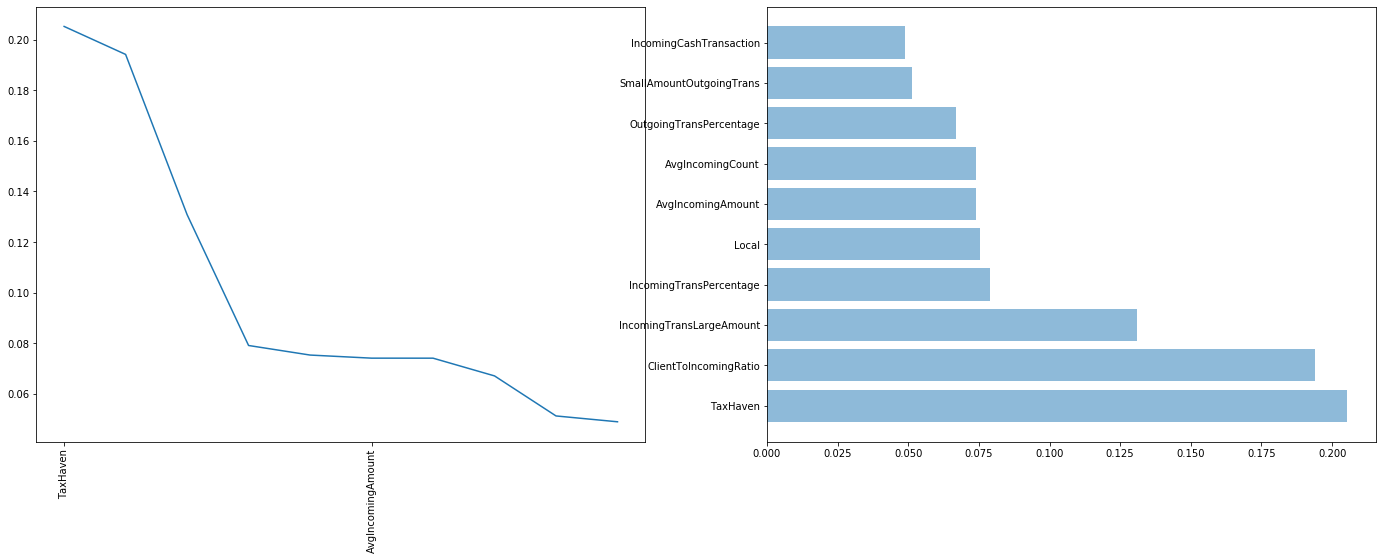

In [101]:
def plot_feature_importance(fi):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24,8))
    ax1.plot(np.arange(0, len(fi.index)), fi['importance'])
    label_nrs = np.arange(0, len(fi.index), 5 )
    ax1.set_xticks(label_nrs)
    ax1.set_xticklabels(fi['feature'][label_nrs], rotation=90)
    
    num_bar = min(len(fi.index), 30)
    ax2.barh(np.arange(0, num_bar), fi['importance'][:num_bar], align='center', alpha=0.5)
    ax2.set_yticks(np.arange(0, num_bar))
    ax2.set_yticklabels(fi['feature'][:num_bar])
    print(ax2)

plot_feature_importance(fi)

Text(0.5, 1, 'Relation Between Cash and Online transactions')

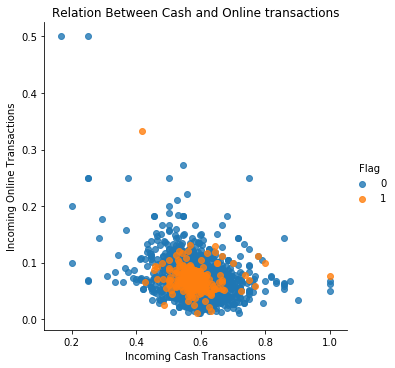

In [36]:
import seaborn as sns
sns.lmplot(x="IncomingCashTransaction", y="IncomingOnlineTransaction", data=SummarizedData, fit_reg=False, hue='Flag', legend=True)
plt.xlabel('Incoming Cash Transactions')
plt.ylabel('Incoming Online Transactions')
plt.title('Relation Between Cash and Online transactions')

In [113]:
SummarizedData.columns.values

array(['Foreign', 'Local', 'TaxHaven', 'ClientToIncomingRatio',
       'IncomingTransSmallAmount', 'IncomingTransLargeAmount',
       'TypeAccount', 'IncomingCashTransaction',
       'IncomingOnlineTransaction', 'AnnualExpenditure', 'AnnualRevenue',
       'LargeAmoutOutgoingTrans', 'SmallAmountOutgoingTrans',
       'AvgTransPerClient', 'IncomingTransPercentage',
       'OutgoingTransPercentage', 'AvgIncomingAmount',
       'AvgOutgoingAmount', 'AvgIncomingCount', 'AvgOutgoingCount',
       'AnnualProfit', 'PercentageExpenditure', 'Flag'], dtype=object)

Text(0.5, 1, 'Relation Between Local and Foreign transactions')

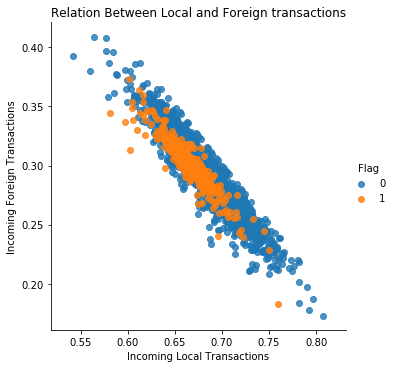

In [9]:
import seaborn as sns
sns.lmplot(x="Local", y="Foreign", data=SummarizedData, fit_reg=False, hue='Flag', legend=True)
plt.xlabel('Incoming Local Transactions')
plt.ylabel('Incoming Foreign Transactions')
plt.title('Relation Between Local and Foreign transactions')

In [236]:
# from sklearn.ensemble import GradientBoostingClassifier
parameters = {
    "loss":["deviance","exponential"],
    "learning_rate": [1],
    "min_samples_split":[2],
    "min_samples_leaf":[1],
    "max_depth":[10,11,12,13],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse"],
    "subsample":[1.0],
    "n_estimators":[14]
    }

In [237]:
clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

grid_fit = clf.fit(X_train,Y_train)

best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(X_test)

TrainPred = best_clf.predict(X_train)
  
    

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Esimator GradientBoostingClassifier(criterion='friedman_mse', init=None, learning_rate=1,
                           loss='exponential', max_depth=10,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=14,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the training data: 1.0000
Final F-score on the training data: 1.0000
precision_score 1.0
recall_score 1.0
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9847
Final F-score on the testing data: 0.7882
precision_score 0.9705882352941176
recall_score 0.6971830985915493
[[2855    3]
 [  43   99]]
Auc Score is :  0.8480667067485388


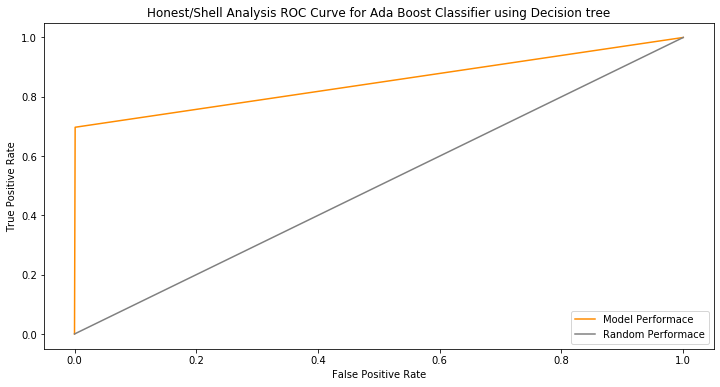

In [238]:
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the training data: {:.4f}".format(accuracy_score(Y_train,TrainPred)))
print ("Final F-score on the training data: {:.4f}".format(fbeta_score(Y_train,TrainPred,beta = 1.2)))
print('precision_score',precision_score(Y_train,TrainPred))
print('recall_score',recall_score(Y_train,TrainPred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_test,best_predictions,beta = 1.2)))
print('precision_score',precision_score(Y_test,best_predictions))
print('recall_score',recall_score(Y_test,best_predictions))
cm = confusion_matrix(Y_test,best_predictions,labels = [0,1])
print(cm)
fpr, tpr, thresholds = roc_curve(Y_test,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(Y_test,best_predictions))

# After Removal Of Variables From Summarized Data

In [51]:
SummarizedData_copy = SummarizedData.copy()
SummarizedData_copy = SummarizedData_copy.drop(['AnnualRevenue','AvgIncomingCount','AvgIncomingAmount','TypeAccount','Foreign','AnnualProfit'], axis = 1)

In [52]:
XTrain = SummarizedData_copy.iloc[:, SummarizedData_copy.columns != 'Flag']
YTrain = SummarizedData_copy.iloc[:, SummarizedData_copy.columns == 'Flag']
# Whole dataset
Xtrain, Xtest, Ytrain, Ytest = train_test_split(XTrain,YTrain,test_size = 0.3, random_state = 0)

In [53]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)},{'min_samples_split': (0.1,0.2,0.3,0.4,0.5)},{'min_samples_leaf': (1,2,3,4,5,6,7)},{'min_weight_fraction_leaf': (0.0,0.1,0.2),"max_features":[12,13,14,15]}
scorer = make_scorer(fbeta_score,beta=1.5)

grid_obj = GridSearchCV(clf, param_grid = parameters, scoring=scorer)
grid_fit = grid_obj.fit(Xtrain,Ytrain)

best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(Xtest)

TrainPred = best_clf.predict(Xtrain)


c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted sa

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'pre

Best Esimator DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=14, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000
precision_score 1.0
recall_score 1.0
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9747
Final F-score on the testing data: 0.7285
precision_score 0.7357142857142858
recall_score 0.7253521126760564
[[ 103   39]
 [  37 2821]]
Auc Score is :  0.8562029982554531


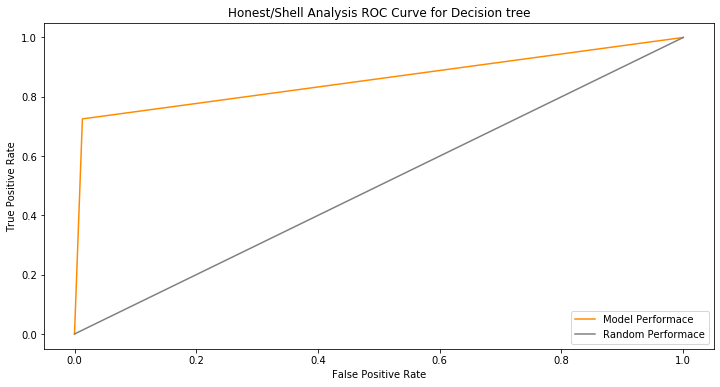

In [54]:
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Ytrain,TrainPred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Ytrain,TrainPred,beta = 1.5)))
print('precision_score',precision_score(Ytrain,TrainPred))
print('recall_score',recall_score(Ytrain,TrainPred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Ytest,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Ytest,best_predictions,beta = 1.5)))
print('precision_score',precision_score(Ytest,best_predictions))
print('recall_score',recall_score(Ytest,best_predictions))
cm = confusion_matrix(Y_test,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(Ytest,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(Ytest,best_predictions))

In [55]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2,3,4,5,6,7,8],"learning_rate":[0.5,1,1.5,2,2.5,3.5]
             }
DTC = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

grid_fit = grid_search_ABC.fit(Xtrain,Ytrain)

best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(Xtest)

TrainPred = best_clf.predict(Xtrain)

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

Best Esimator AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
         

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000
precision_score 1.0
recall_score 1.0
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9893
Final F-score on the testing data: 0.8397
precision_score 0.9824561403508771
recall_score 0.7887323943661971
[[ 112   30]
 [   2 2856]]
Auc Score is :  0.894016302151608


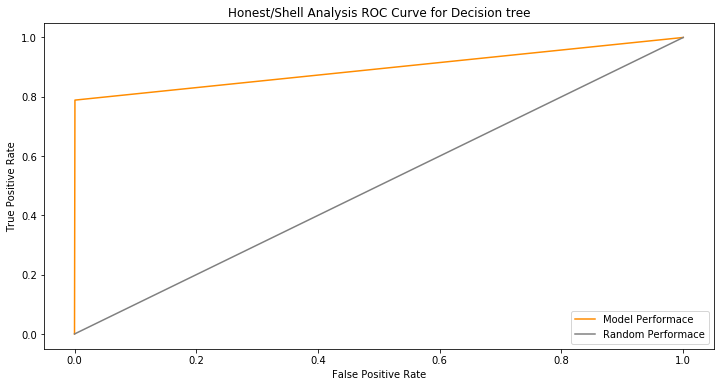

In [56]:
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Ytrain,TrainPred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Ytrain,TrainPred,beta = 1.5)))
print('precision_score',precision_score(Ytrain,TrainPred))
print('recall_score',recall_score(Ytrain,TrainPred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Ytest,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Ytest,best_predictions,beta = 1.5)))
print('precision_score',precision_score(Ytest,best_predictions))
print('recall_score',recall_score(Ytest,best_predictions))
cm = confusion_matrix(Y_test,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(Ytest,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(Ytest,best_predictions))

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Final accuracy score on the Traning data: 0.9931
Final accuracy score on the testing data: 0.9793
Final F-score on the testing data: 0.7791
precision_score 0.7857142857142857
recall_score 0.7746478873239436
[[ 110   32]
 [  30 2828]]
Auc Score is :  0.8820755181896135


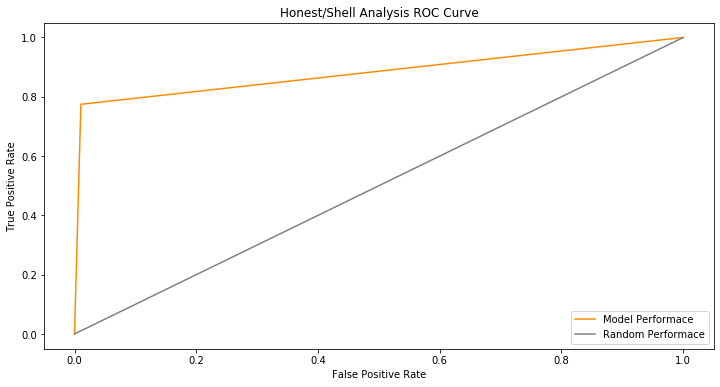

In [57]:
model2 = xgb.XGBClassifier(n_estimators=5, max_depth=8, learning_rate=1.5, subsample=0.5)
train_model1 = model2.fit(Xtrain, Ytrain)
pred1 = train_model1.predict(Xtest)
train_pred = train_model1.predict(Xtrain)
print ("Final accuracy score on the Traning data: {:.4f}".format(accuracy_score(Ytrain,train_pred)))
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Ytest,pred1)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Ytest,pred1,beta = 1.2)))
print('precision_score',precision_score(Ytest,pred1))
print('recall_score',recall_score(Ytest,pred1))
cm = confusion_matrix(Ytest,pred1,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(Ytest,pred1)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve')
plt.legend(loc="lower right")
print('Auc Score is : ',roc_auc_score(Ytest,pred1))

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


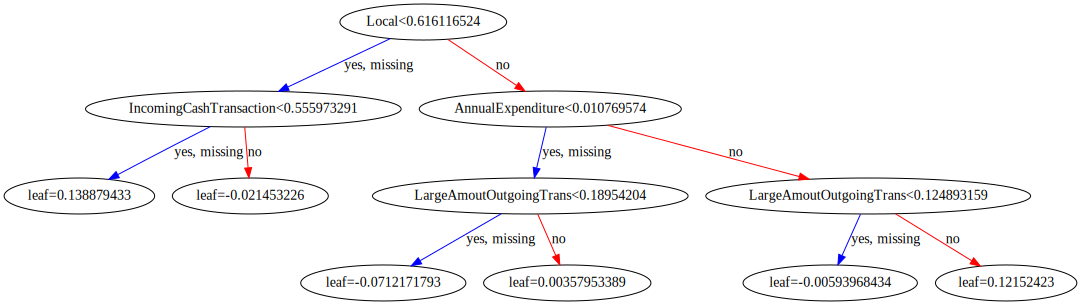

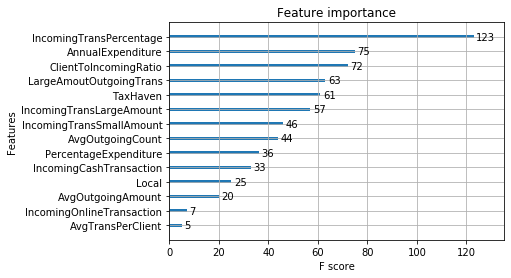

In [58]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_model.fit(Xtrain, Ytrain, early_stopping_rounds=10,eval_set=[(Xtest, Ytest)], verbose=False)

xgb.plot_importance(xgb_model)

# plot the output tree via matplotlib, specifying the ordinal number of the target tree
# xgb.plot_tree(xgb_model, num_trees=xgb_model.best_iteration)

# converts the target tree to a graphviz instance
xgb.to_graphviz(xgb_model, num_trees=xgb_model.best_iteration)

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split":[2],
    "min_samples_leaf":[2],
    "max_depth":[8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[1.0],
    "n_estimators":[10]
    }

In [60]:
clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

grid_fit = clf.fit(Xtrain,Ytrain)

best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(Xtest)

TrainPred = best_clf.predict(Xtrain)

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Esimator GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=8,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 0.9987
Final F-score on the testing data: 0.9850
precision_score 1.0
recall_score 0.9748603351955307
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9873
Final F-score on the testing data: 0.8327
precision_score 0.9642857142857143
recall_score 0.7605633802816901
[[ 108   34]
 [   4 2854]]
Auc Score is :  0.879581900077864


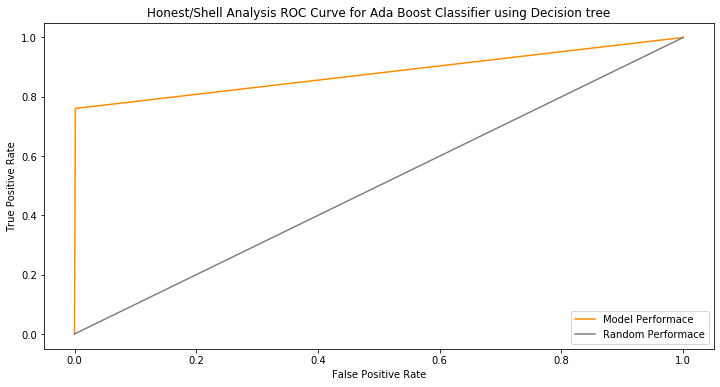

In [61]:
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Ytrain,TrainPred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Ytrain,TrainPred,beta = 1.2)))
print('precision_score',precision_score(Ytrain,TrainPred))
print('recall_score',recall_score(Ytrain,TrainPred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Ytest,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Ytest,best_predictions,beta = 1.2)))
print('precision_score',precision_score(Ytest,best_predictions))
print('recall_score',recall_score(Ytest,best_predictions))
cm = confusion_matrix(Ytest,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(Ytest,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(Ytest,best_predictions))

# Outlier Detection

# PYOD

In [62]:
SummarizedData_copy1 = SummarizedData.copy()


In [63]:
X = SummarizedData_copy1.iloc[:, SummarizedData_copy1.columns != 'Flag']
Y = SummarizedData_copy1.iloc[:, SummarizedData_copy1.columns == 'Flag']
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
rescaledX = scaler.fit_transform(X)


In [64]:
# Whole dataset
TrainX,TestX, TrainY,TestY = train_test_split(rescaledX,Y,test_size = 0.3, random_state = 0)

In [65]:
from pyod.models.knn import KNN   # kNN detector

# train kNN detector
clf_name = 'KNN'
clf = KNN(n_neighbors=100)
clf.fit(TrainX)

# get the prediction label and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(TestX)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(TestX)  # outlier scores

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 0.8791
Final F-score on the testing data: 0.2128
precision_score 0.15142857142857144
recall_score 0.29608938547486036
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.8813
Final F-score on the testing data: 0.1791
precision_score 0.1258741258741259
recall_score 0.2535211267605634
[[  36  106]
 [ 250 2608]]
Auc Score is :  0.5830236844439626


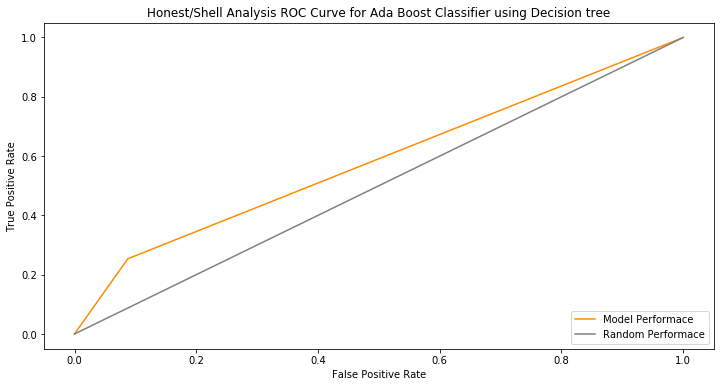

In [66]:
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(TrainY,y_train_pred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(TrainY,y_train_pred,beta = 1.2)))
print('precision_score',precision_score(TrainY,y_train_pred))
print('recall_score',recall_score(TrainY,y_train_pred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(TestY,y_test_pred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(TestY,y_test_pred,beta = 1.2)))
print('precision_score',precision_score(TestY,y_test_pred))
print('recall_score',recall_score(TestY,y_test_pred))
cm = confusion_matrix(TestY,y_test_pred,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(TestY,y_test_pred)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(Ytest,y_test_pred))

Text(0.5, 1.0, 'Plot of Outlier Detection  using KNN Model')

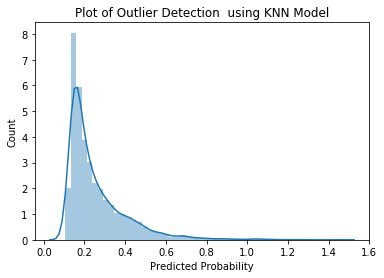

In [67]:
sns.distplot(y_train_scores)
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.title('Plot of Outlier Detection  using KNN Model')

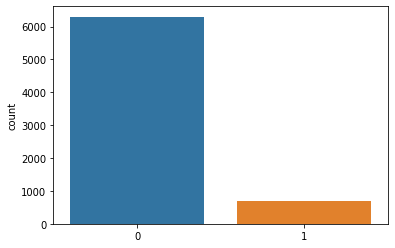

In [68]:
sns.countplot(y_train_pred)

In [69]:
SummarizedData_copy2 = SummarizedData.copy()
X1 = SummarizedData_copy2.iloc[:, SummarizedData_copy2.columns != 'Flag']
Y1 = SummarizedData_copy2.iloc[:, SummarizedData_copy2.columns == 'Flag']
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
rescaledX1 = scaler.fit_transform(X1)

In [70]:
# Whole dataset
TrainX1,TestX1, TrainY1,TestY1 = train_test_split(rescaledX1,Y1,test_size = 0.3, random_state = 0)

In [71]:
from pyod.models.abod import ABOD  

In [72]:
from pyod.utils.data import evaluate_print 

In [73]:
Model1 = ABOD(method = "fast")

In [74]:
Model1.fit(TrainX1)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [75]:
y_test_predict1 = Model1.predict(TestX1)

In [76]:
y_test_scores1 = Model1.decision_function(TestX1)

In [77]:
y_test_prob1 = Model1.predict_proba(TestX1)

In [78]:
evaluate_print('ABOD',TestY1,y_test_scores1)

ABOD ROC:0.8423, precision @ rank n:0.162


In [79]:
y_train_predict1 = Model1.predict(TrainX1)

In [80]:
from pyod.utils.example import visualize

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 0.8731
Final F-score on the testing data: 0.2137
precision_score 0.14760638297872342
recall_score 0.3100558659217877
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.8920
Final F-score on the testing data: 0.2178
precision_score 0.15789473684210525
recall_score 0.29577464788732394
[[  42  100]
 [ 224 2634]]
Auc Score is :  0.60869908041672


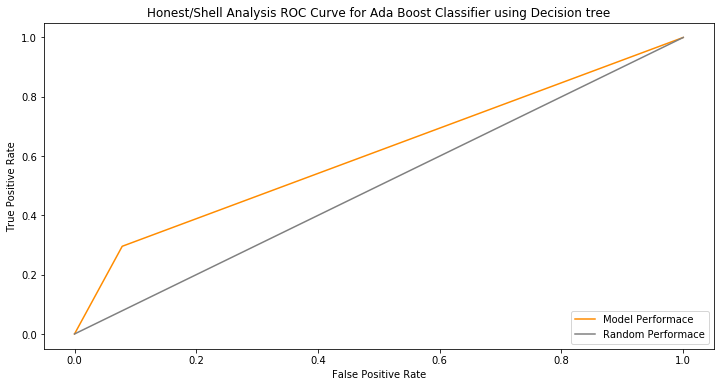

In [82]:
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(TrainY1,y_train_predict1)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(TrainY1,y_train_predict1,beta = 1.2)))
print('precision_score',precision_score(TrainY1,y_train_predict1))
print('recall_score',recall_score(TrainY1,y_train_predict1))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(TestY1,y_test_predict1)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(TestY1,y_test_predict1,beta = 1.2)))
print('precision_score',precision_score(TestY1,y_test_predict1))
print('recall_score',recall_score(TestY1,y_test_predict1))
cm = confusion_matrix(TestY1,y_test_predict1,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(TestY1,y_test_predict1)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(TestY1,y_test_predict1))

Text(0.5, 1.0, 'Plot of Outlier Detection  using KNN Model')

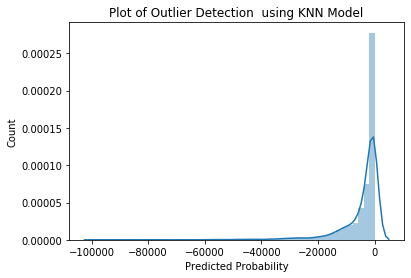

In [83]:
sns.distplot(y_test_scores1)
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.title('Plot of Outlier Detection  using KNN Model')

In [84]:
SummarizedData_copy3 = SummarizedData.copy()
X2 = SummarizedData_copy3.iloc[:, SummarizedData_copy3.columns != 'Flag']
Y2 = SummarizedData_copy3.iloc[:, SummarizedData_copy3.columns == 'Flag']
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
rescaledX2 = scaler.fit_transform(X2)

In [85]:
# Whole dataset
TrainX2,TestX2, TrainY2,TestY2 = train_test_split(rescaledX2,Y2,test_size = 0.3, random_state = 0)

In [86]:
from pyod.models.lof import LOF

In [87]:
Model2 = LOF(n_neighbors = 100,algorithm = "kd_tree",contamination = 0.05)

In [88]:
Model2.fit(TrainX2)

LOF(algorithm='kd_tree', contamination=0.05, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=100, p=2)

In [89]:
y_test_predict2 = Model2.predict(TestX2)

In [90]:
y_test_scores2 = Model2.decision_function(TestX2)

In [91]:
y_test_prob2 = Model2.predict_proba(TestX2)

In [92]:
evaluate_print('LOF',TestY2,y_test_scores2)

LOF ROC:0.8587, precision @ rank n:0.4296


In [93]:
y_train_predict2 = Model2.predict(TrainX2)

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 0.9414
Final F-score on the testing data: 0.4088
precision_score 0.4230769230769231
recall_score 0.3994413407821229
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9357
Final F-score on the testing data: 0.4030
precision_score 0.3559322033898305
recall_score 0.44366197183098594
[[  63   79]
 [ 114 2744]]
Auc Score is :  0.7018869691205315


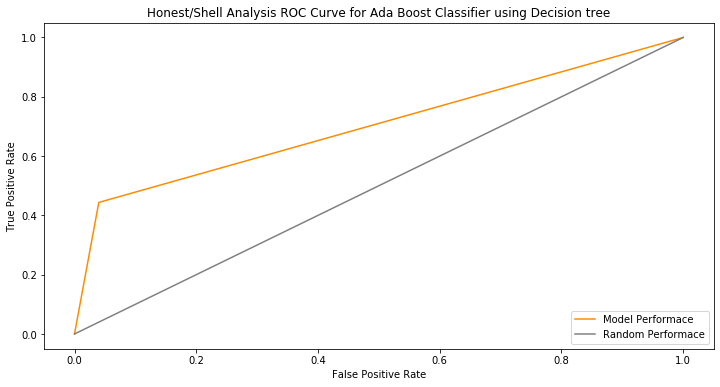

In [95]:
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(TrainY2,y_train_predict2)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(TrainY2,y_train_predict2,beta = 1.2)))
print('precision_score',precision_score(TrainY2,y_train_predict2))
print('recall_score',recall_score(TrainY2,y_train_predict2))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(TestY2,y_test_predict2)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(TestY2,y_test_predict2,beta = 1.2)))
print('precision_score',precision_score(TestY2,y_test_predict2))
print('recall_score',recall_score(TestY2,y_test_predict2))
cm = confusion_matrix(TestY2,y_test_predict2,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(TestY2,y_test_predict2)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(TestY2,y_test_predict2))

# 

# Applying PCA to check Redudancy in Data

In [96]:
SummarizedData_copy4 = SummarizedData.copy()
X4 = SummarizedData_copy4.iloc[:, SummarizedData_copy4.columns != 'Flag']
Y4 = SummarizedData_copy4.iloc[:, SummarizedData_copy4.columns == 'Flag']

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X4 =scaler.fit_transform(X4)

In [98]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X4)

array([[ 4.63588063e-01, -7.73927161e-01, -6.71630326e-01, ...,
         4.70549029e-14,  1.56975837e-15, -1.51158265e-16],
       [-3.69078901e+00,  6.19702223e+00, -2.42337326e-01, ...,
        -3.39330528e-14,  1.63357343e-15, -4.61220970e-16],
       [-1.75307231e+00,  2.96715430e-01,  9.20278817e-01, ...,
        -2.57127459e-15,  1.73031137e-15,  9.86666317e-16],
       ...,
       [-1.55538683e+00,  2.45881567e+00,  1.78955069e+00, ...,
         4.36129960e-16,  4.04169557e-16, -3.19547465e-16],
       [ 1.88211676e+00, -1.02157171e+00,  7.04290394e-01, ...,
        -2.69155413e-15, -2.25258341e-16,  5.22892074e-16],
       [-1.36347874e+00,  5.04606655e-01,  2.90371404e-02, ...,
        -2.52186838e-15,  4.30305201e-16, -3.97811997e-16]])

In [99]:
pca.get_covariance()

array([[ 1.00010001e+00, -9.37033191e-01, -8.46257807e-02,
        -4.54464039e-02, -6.93913227e-03,  4.16207550e-03,
         6.40878288e-03, -1.88300648e-02, -3.54209612e-02,
         2.81785551e-03,  1.80322199e-03,  1.53958573e-02,
        -1.53958573e-02, -2.17081227e-05, -4.63563073e-03,
         4.63563073e-03, -2.54411617e-03, -6.16890339e-05,
        -1.60249542e-03,  1.52696505e-03,  2.92921655e-03,
        -1.92688654e-02],
       [-9.37033191e-01,  1.00010001e+00, -2.68983773e-01,
         5.00537306e-02, -2.02666571e-03,  4.70218767e-03,
        -1.47074857e-02,  2.66891820e-02,  3.22738214e-02,
        -5.63917749e-03, -3.55374768e-03, -1.77833709e-02,
         1.77833709e-02, -8.10334373e-05,  1.19941557e-02,
        -1.19941557e-02,  3.73369812e-03, -1.23598567e-03,
         3.19207369e-03, -3.28798590e-03, -5.74688434e-03,
         1.86995901e-02],
       [-8.46257807e-02, -2.68983773e-01,  1.00010001e+00,
        -1.74608169e-02,  2.49014201e-02, -2.48762346e-02,
    

In [100]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([3.67424638e-01, 1.40191085e-01, 8.99995456e-02, 8.91222310e-02,
       6.24496932e-02, 5.73966070e-02, 4.78180440e-02, 4.58852103e-02,
       4.38615410e-02, 3.17713392e-02, 1.18393343e-02, 7.07502656e-03,
       3.64573178e-03, 8.29969715e-04, 3.16604916e-04, 2.38844610e-04,
       1.33895165e-04, 6.58524308e-07, 7.87126260e-10, 1.97932021e-31,
       2.57169327e-32, 8.46261667e-33])

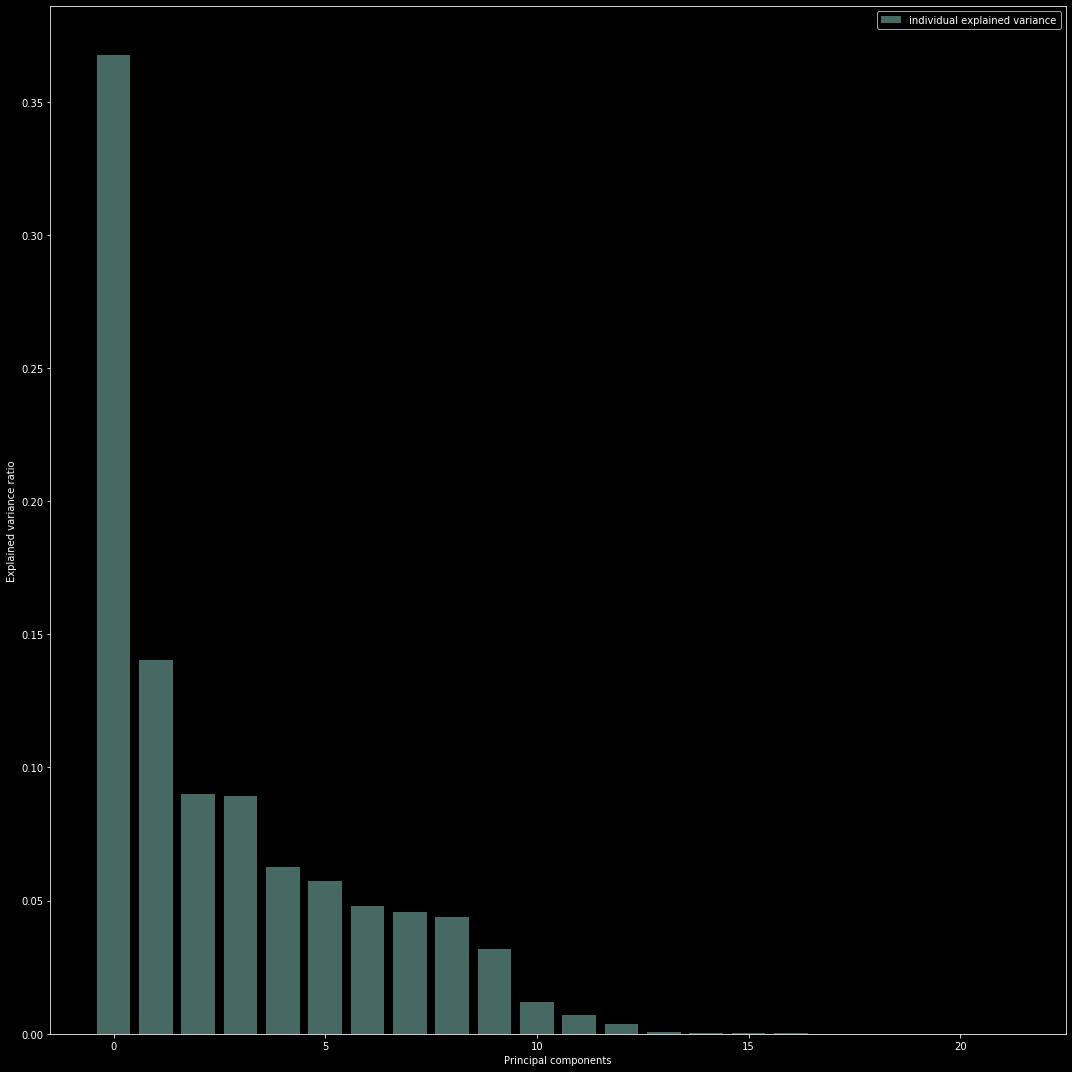

In [101]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(15,15))

    plt.bar(range(22), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [102]:
pca=PCA(n_components=13)
X_new=pca.fit_transform(X4)

In [103]:
pca.get_covariance()

array([[ 1.00178755e+00, -9.35287369e-01, -8.40134084e-02,
        -4.54464577e-02, -6.94030097e-03,  4.16093777e-03,
         6.40881582e-03, -1.88300866e-02, -3.54209709e-02,
         2.82083950e-03,  1.80329500e-03,  1.53956379e-02,
        -1.53956379e-02, -2.18736235e-05, -4.63588703e-03,
         4.63588703e-03, -2.54135411e-03, -6.41877197e-05,
        -1.60125675e-03,  1.52543377e-03,  2.92603621e-03,
        -1.92695487e-02],
       [-9.35287369e-01,  1.00190604e+00, -2.68350025e-01,
         5.00534509e-02, -2.02544749e-03,  4.70363232e-03,
        -1.47073060e-02,  2.66891058e-02,  3.22737930e-02,
        -5.63779611e-03, -3.55803901e-03, -1.77840415e-02,
         1.77840415e-02, -7.47866076e-05,  1.19934359e-02,
        -1.19934359e-02,  3.74713052e-03, -1.24912242e-03,
         3.20315517e-03, -3.28668844e-03, -5.76454239e-03,
         1.86969893e-02],
       [-8.40134084e-02, -2.68350025e-01,  1.00032142e+00,
        -1.74598713e-02,  2.49011677e-02, -2.48772179e-02,
    

In [104]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.36742464, 0.14019108, 0.08999955, 0.08912223, 0.06244969,
       0.05739661, 0.04781804, 0.04588521, 0.04386154, 0.03177134,
       0.01183933, 0.00707503, 0.00364573])

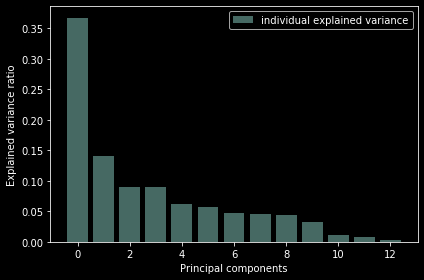

In [105]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(13), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [106]:
# Whole dataset
X4train, X4test, Y4train, Y4test = train_test_split(X_new,Y4,test_size = 0.3, random_state = 0)

In [107]:
clf4 = tree.DecisionTreeClassifier(criterion='entropy')

parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)},{'min_samples_split': (0.1,0.2,0.3,0.4,0.5)},{'min_samples_leaf': (1,2,3,4,5,6,7)},{'min_weight_fraction_leaf': (0.0,0.1,0.2),"max_features":[12,13,14,15]}
scorer = make_scorer(fbeta_score,beta=1.5)

grid_obj = GridSearchCV(clf4, param_grid = parameters, scoring=scorer)
grid_fit = grid_obj.fit(X4train,Y4train)

best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(X4test)

TrainPred = best_clf.predict(X4train)

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted sa

ValueError: max_features must be in (0, n_features]

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 0.9987
Final F-score on the testing data: 0.9825
precision_score 1.0
recall_score 0.9748603351955307
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9873
Final F-score on the testing data: 0.8134
precision_score 0.9642857142857143
recall_score 0.7605633802816901
[[ 108   34]
 [   4 2854]]
Auc Score is :  0.879581900077864


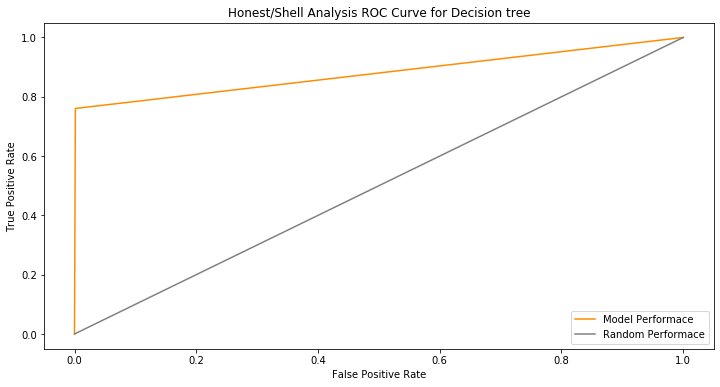

In [108]:
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y4train,TrainPred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y4train,TrainPred,beta = 1.5)))
print('precision_score',precision_score(Y4train,TrainPred))
print('recall_score',recall_score(Y4train,TrainPred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y4test,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y4test,best_predictions,beta = 1.5)))
print('precision_score',precision_score(Y4test,best_predictions))
print('recall_score',recall_score(Y4test,best_predictions))
cm = confusion_matrix(Y4test,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(Y4test,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(Y4test,best_predictions))

In [109]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2,3,4,5,6,7,8],"learning_rate":[0.5,1,1.5,2,2.5,3.5]
             }
DTC = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

grid_fit = grid_search_ABC.fit(X4train,Y4train)

best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(X4test)

TrainPred = best_clf.predict(X4train)

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

Best Esimator AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
            

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000
precision_score 1.0
recall_score 1.0
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9810
Final F-score on the testing data: 0.7057
precision_score 0.9473684210526315
recall_score 0.6338028169014085
[[  90   52]
 [   5 2853]]
Auc Score is :  0.8160266708719779


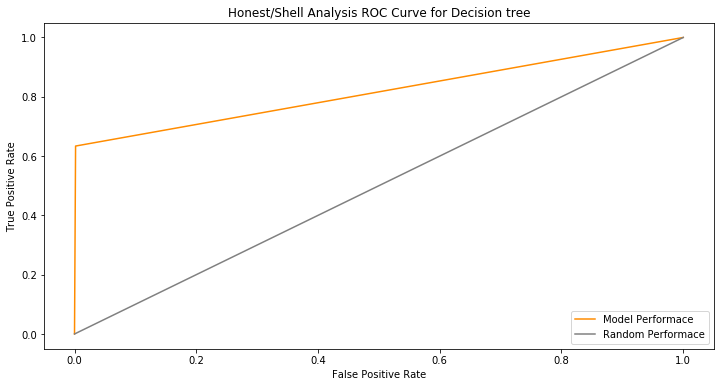

In [111]:
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y4train,TrainPred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y4train,TrainPred,beta = 1.5)))
print('precision_score',precision_score(Y4train,TrainPred))
print('recall_score',recall_score(Y4train,TrainPred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y4test,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y4test,best_predictions,beta = 1.5)))
print('precision_score',precision_score(Y4test,best_predictions))
print('recall_score',recall_score(Y4test,best_predictions))
cm = confusion_matrix(Y4test,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(Y4test,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(Y4test,best_predictions))

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Final accuracy score on the Traning data: 0.9844
Final accuracy score on the testing data: 0.9687
Final F-score on the testing data: 0.6933
precision_score 0.6518987341772152
recall_score 0.7253521126760564
[[ 103   39]
 [  55 2803]]
Auc Score is :  0.8530539429720381


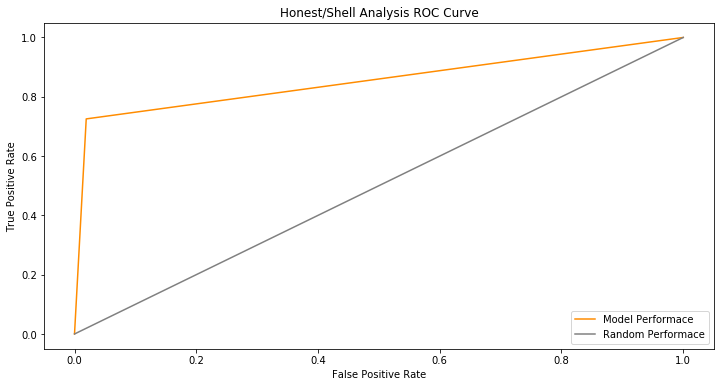

In [112]:
model2 = xgb.XGBClassifier(n_estimators=5, max_depth=8, learning_rate=1.5, subsample=0.5)
train_model1 = model2.fit(X4train, Y4train)
pred1 = train_model1.predict(X4test)
train_pred = train_model1.predict(X4train)
print ("Final accuracy score on the Traning data: {:.4f}".format(accuracy_score(Y4train,train_pred)))
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y4test,pred1)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y4test,pred1,beta = 1.2)))
print('precision_score',precision_score(Y4test,pred1))
print('recall_score',recall_score(Y4test,pred1))
cm = confusion_matrix(Y4test,pred1,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(Y4test,pred1)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve')
plt.legend(loc="lower right")
print('Auc Score is : ',roc_auc_score(Y4test,pred1))

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


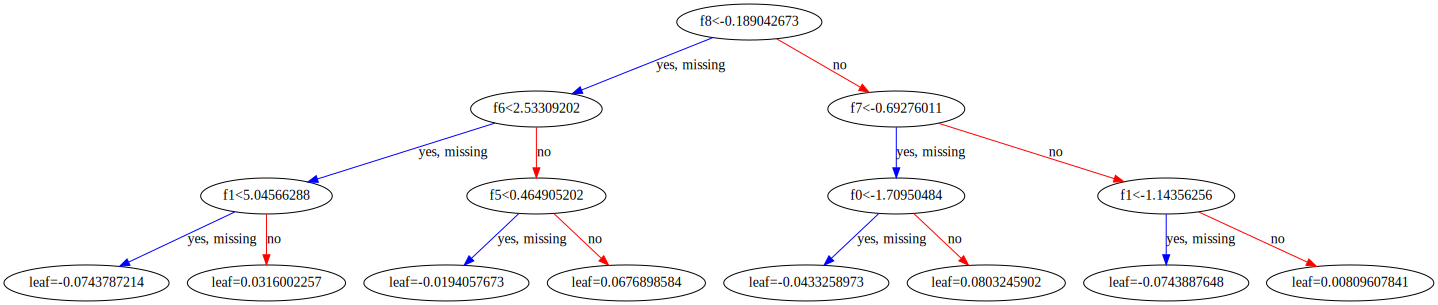

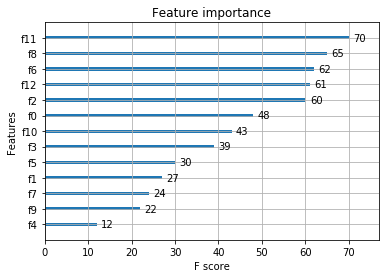

In [113]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_model.fit(X4train, Y4train, early_stopping_rounds=10,eval_set=[(X4test, Y4test)], verbose=False)

xgb.plot_importance(xgb_model)

# plot the output tree via matplotlib, specifying the ordinal number of the target tree
# xgb.plot_tree(xgb_model, num_trees=xgb_model.best_iteration)

# converts the target tree to a graphviz instance
xgb.to_graphviz(xgb_model, num_trees=xgb_model.best_iteration)

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split":[2],
    "min_samples_leaf":[2],
    "max_depth":[8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[1.0],
    "n_estimators":[10]
    }

In [115]:
clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

grid_fit = clf.fit(X4train,Y4train)

best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(X4test)

TrainPred = best_clf.predict(X4train)

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Esimator GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=8,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 0.9929
Final F-score on the testing data: 0.8990
precision_score 1.0
recall_score 0.8603351955307262
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9740
Final F-score on the testing data: 0.5960
precision_score 0.8809523809523809
recall_score 0.5211267605633803
[[  74   68]
 [  10 2848]]
Auc Score is :  0.7588139051242374


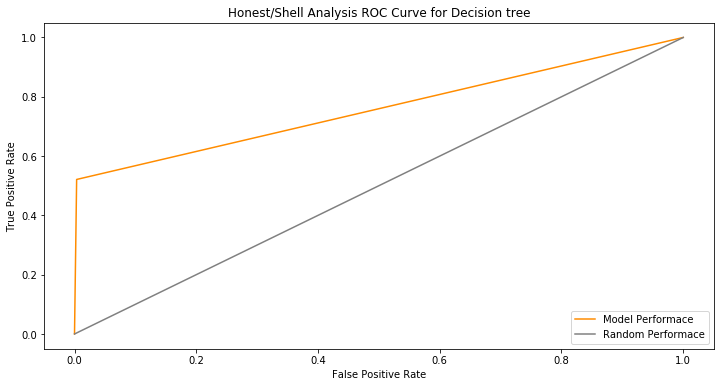

In [116]:
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y4train,TrainPred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y4train,TrainPred,beta = 1.5)))
print('precision_score',precision_score(Y4train,TrainPred))
print('recall_score',recall_score(Y4train,TrainPred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y4test,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y4test,best_predictions,beta = 1.5)))
print('precision_score',precision_score(Y4test,best_predictions))
print('recall_score',recall_score(Y4test,best_predictions))
cm = confusion_matrix(Y4test,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(Y4test,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(Y4test,best_predictions))

# Analysis using variables set using Single variable "Tax Haven"

# # Used Ada Boost Algorthm

In [117]:
SummarizedData_copy10 = SummarizedData.copy()

In [118]:
X10 = SummarizedData_copy10.iloc[:, SummarizedData_copy10.columns != 'Flag']
Y10 = SummarizedData_copy10.iloc[:, SummarizedData_copy10.columns == 'Flag']
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
rescaledX10  = scaler.fit_transform(X10)

In [119]:
# Whole dataset
TrainX10,TestX10, TrainY10,TestY10 = train_test_split(rescaledX10,Y10,test_size =0.3, random_state = 0)

In [120]:
m = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
m.fit(TrainX10,TrainY10)
fi = pd.DataFrame({'feature': X10.columns, 'importance': m.feature_importances_}).sort_values(by='importance', ascending=False)
fi = fi.reset_index()
fi

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


index                    feature  importance
0       2                   TaxHaven    0.143196
1       3      ClientToIncomingRatio    0.093394
2      15    OutgoingTransPercentage    0.072164
3      14    IncomingTransPercentage    0.069346
4       5   IncomingTransLargeAmount    0.068770
5       4   IncomingTransSmallAmount    0.062218
6       1                      Local    0.061786
7       9          AnnualExpenditure    0.059554
8      20               AnnualProfit    0.052650
9      17          AvgOutgoingAmount    0.035827
10     21      PercentageExpenditure    0.034808
11     19           AvgOutgoingCount    0.034386
12     12   SmallAmountOutgoingTrans    0.028802
13      7    IncomingCashTransaction    0.028510
14     11    LargeAmoutOutgoingTrans    0.028497
15     10              AnnualRevenue    0.027596
16     13          AvgTransPerClient    0.026330
17     16          AvgIncomingAmount    0.022813
18     18           AvgIncomingCount    0.019787
19      0                    Foreign    0.015981
20      8  IncomingOnlineTransaction    0.009823
21      6                TypeAccount    0.003763

In [121]:
X11 = SummarizedData_copy10.iloc[:, SummarizedData_copy10.columns == 'TaxHaven']
Y11 = SummarizedData_copy10.iloc[:, SummarizedData_copy10.columns == 'Flag']
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
rescaledX11  = scaler.fit_transform(X11)

In [122]:
# Whole dataset
X_train,X_test, Y_train,Y_test = train_test_split(rescaledX11,Y11,test_size = 0.3, random_state = 0)

In [123]:
##AdaBoostClassifiers
from sklearn.ensemble import AdaBoostClassifier
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2,3,4,5,6,7,8],"learning_rate":[0.5,1,1.5,2,2.5,3.5]
             }
DTC = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

grid_fit = grid_search_ABC.fit(X_train,Y_train)

best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(X_test)

TrainPred = best_clf.predict(X_train)

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

Best Esimator AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
            

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 0.9553
Final F-score on the testing data: 0.2446
precision_score 0.8082191780821918
recall_score 0.164804469273743
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9447
Final F-score on the testing data: 0.0312
precision_score 0.1
recall_score 0.02112676056338028
[[   3  139]
 [  27 2831]]
Auc Score is :  0.5058397973565677


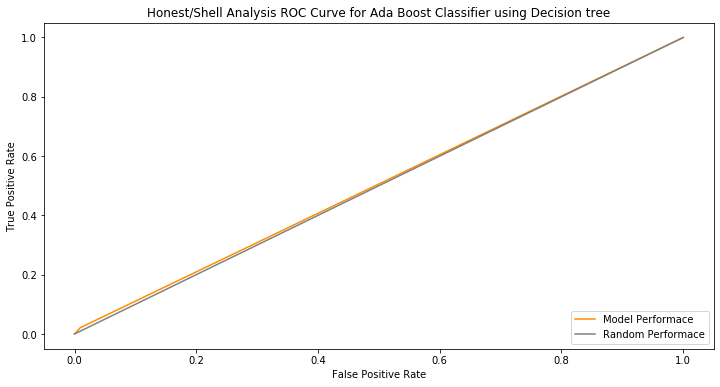

In [124]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score,f1_score
from sklearn.metrics import precision_recall_curve,fbeta_score
from sklearn.metrics import roc_curve

print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_train,TrainPred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_train,TrainPred,beta = 1.2)))
print('precision_score',precision_score(Y_train,TrainPred))
print('recall_score',recall_score(Y_train,TrainPred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_test,best_predictions,beta = 1.2)))
print('precision_score',precision_score(Y_test,best_predictions))
print('recall_score',recall_score(Y_test,best_predictions))
cm = confusion_matrix(Y_test,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(Y_test,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(Y_test,best_predictions))

In [125]:
X11 = SummarizedData_copy10[['TaxHaven','ClientToIncomingRatio']]
Y11 = SummarizedData_copy10.iloc[:, SummarizedData_copy10.columns == 'Flag']
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
rescaledX11  = scaler.fit_transform(X11)

In [126]:
# Whole dataset
X_train,X_test, Y_train,Y_test = train_test_split(rescaledX11,Y11,test_size = 0.3, random_state = 0)

In [127]:
##AdaBoostClassifiers
from sklearn.ensemble import AdaBoostClassifier
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2,3,4,5,6,7,8],"learning_rate":[0.5,1,1.5,2,2.5,3.5]
             }
DTC = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

grid_fit = grid_search_ABC.fit(X_train,Y_train)

best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(X_test)

TrainPred = best_clf.predict(X_train)

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

Best Esimator AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
            

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 0.9964
Final F-score on the testing data: 0.9630
precision_score 0.9743589743589743
recall_score 0.9553072625698324
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9457
Final F-score on the testing data: 0.3195
precision_score 0.39603960396039606
recall_score 0.28169014084507044
[[  40  102]
 [  61 2797]]
Auc Score is :  0.6301732719620734


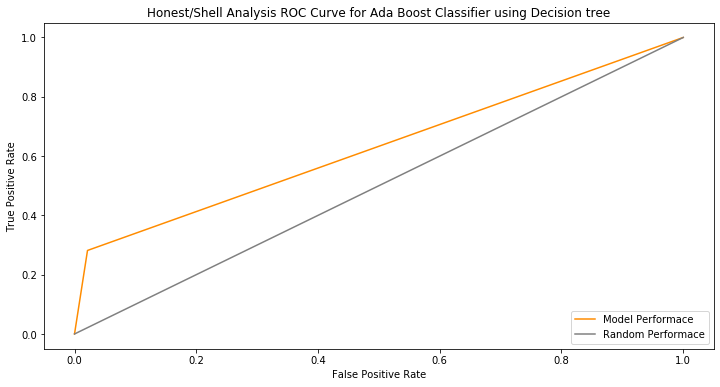

In [128]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score,f1_score
from sklearn.metrics import precision_recall_curve,fbeta_score
from sklearn.metrics import roc_curve

print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_train,TrainPred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_train,TrainPred,beta = 1.2)))
print('precision_score',precision_score(Y_train,TrainPred))
print('recall_score',recall_score(Y_train,TrainPred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_test,best_predictions,beta = 1.2)))
print('precision_score',precision_score(Y_test,best_predictions))
print('recall_score',recall_score(Y_test,best_predictions))
cm = confusion_matrix(Y_test,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(Y_test,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(Y_test,best_predictions))

In [129]:
X11 = SummarizedData_copy10[['TaxHaven','ClientToIncomingRatio','OutgoingTransPercentage']]
Y11 = SummarizedData_copy10.iloc[:, SummarizedData_copy10.columns == 'Flag']
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
rescaledX11  = scaler.fit_transform(X11)

In [130]:
# Whole dataset
X_train,X_test, Y_train,Y_test = train_test_split(rescaledX11,Y11,test_size = 0.3, random_state = 0)

In [131]:
##AdaBoostClassifiers
from sklearn.ensemble import AdaBoostClassifier
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2,3,4,5,6,7,8],"learning_rate":[0.5,1,1.5,2,2.5,3.5]
             }
DTC = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

grid_fit = grid_search_ABC.fit(X_train,Y_train)

best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(X_test)

TrainPred = best_clf.predict(X_train)

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

Best Esimator AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
            

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 0.9996
Final F-score on the testing data: 0.9961
precision_score 0.9944289693593314
recall_score 0.9972067039106145
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9527
Final F-score on the testing data: 0.4113
precision_score 0.5
recall_score 0.36619718309859156
[[  52   90]
 [  52 2806]]
Auc Score is :  0.6740013207305413


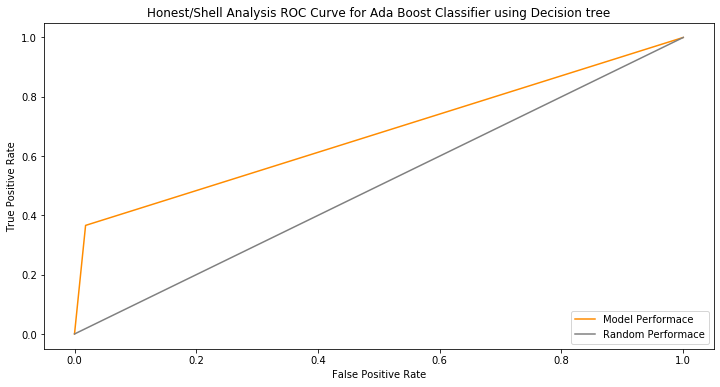

In [132]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score,f1_score
from sklearn.metrics import precision_recall_curve,fbeta_score
from sklearn.metrics import roc_curve

print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_train,TrainPred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_train,TrainPred,beta = 1.2)))
print('precision_score',precision_score(Y_train,TrainPred))
print('recall_score',recall_score(Y_train,TrainPred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_test,best_predictions,beta = 1.2)))
print('precision_score',precision_score(Y_test,best_predictions))
print('recall_score',recall_score(Y_test,best_predictions))
cm = confusion_matrix(Y_test,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(Y_test,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(Y_test,best_predictions))

In [133]:
X11 = SummarizedData_copy10[['TaxHaven','ClientToIncomingRatio','OutgoingTransPercentage','IncomingTransLargeAmount']]
Y11 = SummarizedData_copy10.iloc[:, SummarizedData_copy10.columns == 'Flag']
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
rescaledX11  = scaler.fit_transform(X11)

In [134]:
# Whole dataset
X_train,X_test, Y_train,Y_test = train_test_split(rescaledX11,Y11,test_size = 0.3, random_state = 0)

In [135]:
##AdaBoostClassifiers
from sklearn.ensemble import AdaBoostClassifier
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2,3,4,5,6,7,8],"learning_rate":[0.5,1,1.5,2,2.5,3.5]
             }
DTC = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

grid_fit = grid_search_ABC.fit(X_train,Y_train)

best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(X_test)

TrainPred = best_clf.predict(X_train)

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

Best Esimator AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
         

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000
precision_score 1.0
recall_score 1.0
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9670
Final F-score on the testing data: 0.5665
precision_score 0.7216494845360825
recall_score 0.49295774647887325
[[  70   72]
 [  27 2831]]
Auc Score is :  0.7417552903143142


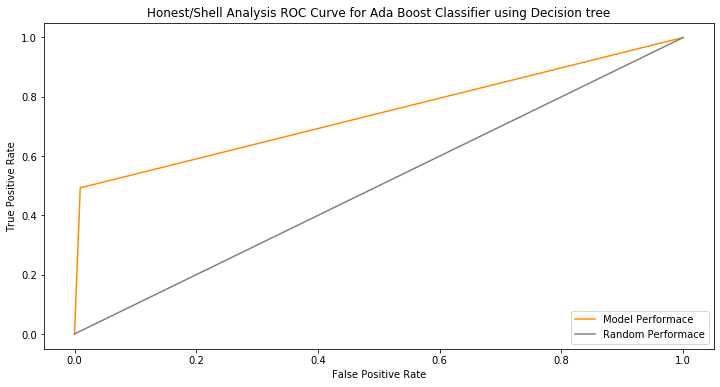

In [136]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score,f1_score
from sklearn.metrics import precision_recall_curve,fbeta_score
from sklearn.metrics import roc_curve

print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_train,TrainPred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_train,TrainPred,beta = 1.2)))
print('precision_score',precision_score(Y_train,TrainPred))
print('recall_score',recall_score(Y_train,TrainPred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_test,best_predictions,beta = 1.2)))
print('precision_score',precision_score(Y_test,best_predictions))
print('recall_score',recall_score(Y_test,best_predictions))
cm = confusion_matrix(Y_test,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(Y_test,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(Y_test,best_predictions))

In [137]:
X11 = SummarizedData_copy10[['TaxHaven','ClientToIncomingRatio','OutgoingTransPercentage','IncomingTransLargeAmount','AnnualExpenditure']]
Y11 = SummarizedData_copy10.iloc[:, SummarizedData_copy10.columns == 'Flag']
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
rescaledX11  = scaler.fit_transform(X11)

In [138]:
# Whole dataset
X_train,X_test, Y_train,Y_test = train_test_split(rescaledX11,Y11,test_size = 0.30, random_state = 0)

In [139]:
##AdaBoostClassifiers
from sklearn.ensemble import AdaBoostClassifier
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2,3,4,5,6,7,8],"learning_rate":[0.5,1,1.5,2,2.5,3.5]
             }
DTC = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

grid_fit = grid_search_ABC.fit(X_train,Y_train)

best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(X_test)

TrainPred = best_clf.predict(X_train)

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Esimator AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
         

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000
precision_score 1.0
recall_score 1.0
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9767
Final F-score on the testing data: 0.7309
precision_score 0.7857142857142857
recall_score 0.6971830985915493
[[  99   43]
 [  27 2831]]
Auc Score is :  0.8438679663706521


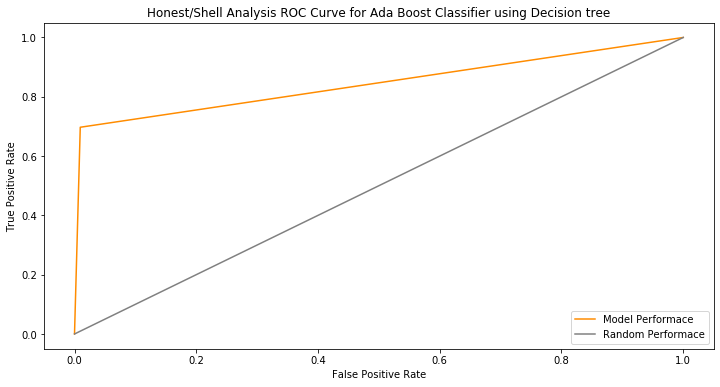

In [140]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score,f1_score
from sklearn.metrics import precision_recall_curve,fbeta_score
from sklearn.metrics import roc_curve

print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_train,TrainPred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_train,TrainPred,beta = 1.2)))
print('precision_score',precision_score(Y_train,TrainPred))
print('recall_score',recall_score(Y_train,TrainPred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_test,best_predictions,beta = 1.2)))
print('precision_score',precision_score(Y_test,best_predictions))
print('recall_score',recall_score(Y_test,best_predictions))
cm = confusion_matrix(Y_test,best_predictions,labels =[1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(Y_test,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(Y_test,best_predictions))

In [141]:
X11 = SummarizedData_copy10[['TaxHaven','ClientToIncomingRatio','OutgoingTransPercentage','IncomingTransLargeAmount','AnnualExpenditure','AvgOutgoingAmount']]
Y11 = SummarizedData_copy10.iloc[:, SummarizedData_copy10.columns == 'Flag']
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
rescaledX11  = scaler.fit_transform(X11)

In [142]:
# Whole dataset
X_train,X_test, Y_train,Y_test = train_test_split(rescaledX11,Y11,test_size = 0.3, random_state = 0)

In [143]:
##AdaBoostClassifiers
from sklearn.ensemble import AdaBoostClassifier
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2,3,4,5,6,7,8],"learning_rate":[0.5,1,1.5,2,2.5,3.5]
             }
DTC = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

grid_fit = grid_search_ABC.fit(X_train,Y_train)

best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(X_test)

TrainPred = best_clf.predict(X_train)

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

Best Esimator AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
         

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000
precision_score 1.0
recall_score 1.0
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9797
Final F-score on the testing data: 0.7170
precision_score 0.9263157894736842
recall_score 0.6197183098591549
[[  88   54]
 [   7 2851]]
Auc Score is :  0.8086345223193605


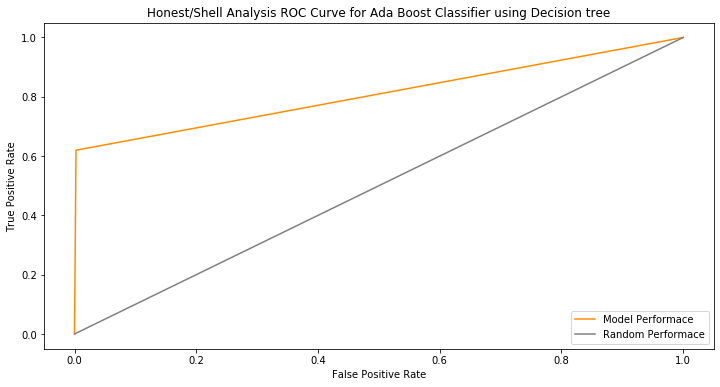

In [144]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score,f1_score
from sklearn.metrics import precision_recall_curve,fbeta_score
from sklearn.metrics import roc_curve

print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_train,TrainPred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_train,TrainPred,beta = 1.2)))
print('precision_score',precision_score(Y_train,TrainPred))
print('recall_score',recall_score(Y_train,TrainPred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_test,best_predictions,beta = 1.2)))
print('precision_score',precision_score(Y_test,best_predictions))
print('recall_score',recall_score(Y_test,best_predictions))
cm = confusion_matrix(Y_test,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(Y_test,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(Y_test,best_predictions))

In [145]:
X11 = SummarizedData_copy10[['TaxHaven','ClientToIncomingRatio','OutgoingTransPercentage','IncomingTransLargeAmount','AnnualExpenditure','AvgIncomingCount']]
Y11 = SummarizedData_copy10.iloc[:, SummarizedData_copy10.columns == 'Flag']
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
rescaledX11  = scaler.fit_transform(X11)

In [146]:
# Whole dataset
X_train,X_test, Y_train,Y_test = train_test_split(rescaledX11,Y11,test_size = 0.3, random_state = 0)

In [147]:
##AdaBoostClassifiers
from sklearn.ensemble import AdaBoostClassifier
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2,3,4,5,6,7,8],"learning_rate":[0.5,1,1.5,2,2.5,3.5]
             }
DTC = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

grid_fit = grid_search_ABC.fit(X_train,Y_train)

best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(X_test)

TrainPred = best_clf.predict(X_train)

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kbaja4\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConve

Best Esimator AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
         

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000
precision_score 1.0
recall_score 1.0
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9790
Final F-score on the testing data: 0.7408
precision_score 0.8434782608695652
recall_score 0.6830985915492958
[[  97   45]
 [  18 2840]]
Auc Score is :  0.8384002404912329


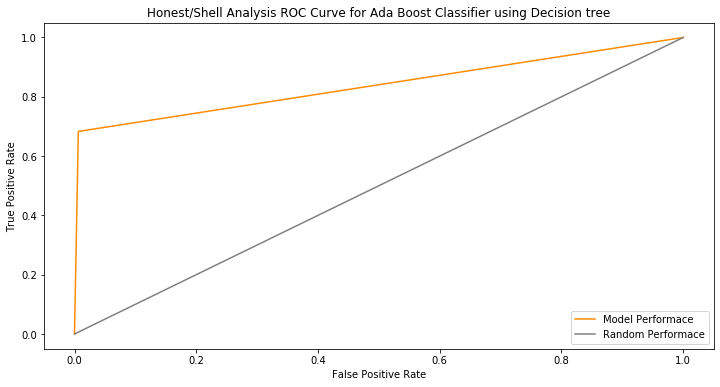

In [148]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score,f1_score
from sklearn.metrics import precision_recall_curve,fbeta_score
from sklearn.metrics import roc_curve

print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_train,TrainPred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_train,TrainPred,beta = 1.2)))
print('precision_score',precision_score(Y_train,TrainPred))
print('recall_score',recall_score(Y_train,TrainPred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_test,best_predictions,beta = 1.2)))
print('precision_score',precision_score(Y_test,best_predictions))
print('recall_score',recall_score(Y_test,best_predictions))
cm = confusion_matrix(Y_test,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(Y_test,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(Y_test,best_predictions))

# Distance Based Approach from K neighbours + Threshold based [KNN]

In [239]:
from pyod.models.knn import KNN 
from sklearn.preprocessing import MinMaxScaler
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score
from sklearn.metrics import recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

In [240]:
SummarizedData_copy = SummarizedData.copy()
X = SummarizedData_copy.iloc[:, SummarizedData_copy.columns != 'Flag']
Y = SummarizedData_copy.iloc[:, SummarizedData_copy.columns == 'Flag']
scaler = MinMaxScaler() 
rescaledX = scaler.fit_transform(X)
TrainX,TestX,TrainY,TestY = train_test_split(rescaledX,Y,test_size = 0.2, random_state = 0)
##Copy Variabel for Accuracy Analysis
CopyTrainY = TrainY.copy()
CopyTestY = TestY.copy()
##Applying KNN algorith,
clf = KNN(n_neighbors=7)
clf.fit(TrainX)
##Predicting Label for training Dataset
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
##Outlier Scores for training Data Points
y_train_scores = clf.decision_scores_  # raw outlier scores
##Predicting Label for Test Dataset
y_test_pred = clf.predict(TestX)  # outlier labels (0 or 1)
##Outlier scores for test dataset
y_test_scores = clf.decision_function(TestX)  # outlier scores

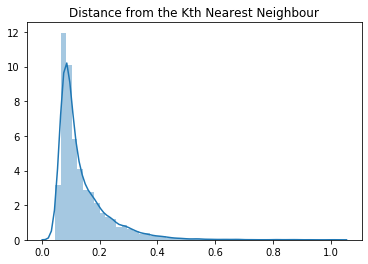

In [241]:
##Plot Outlier scoring Points for training Dataset
sns.distplot(y_train_scores)
plt.title('Distance from the Kth Nearest Neighbour')
plt.savefig('KthDistanceTrainingSet.png')

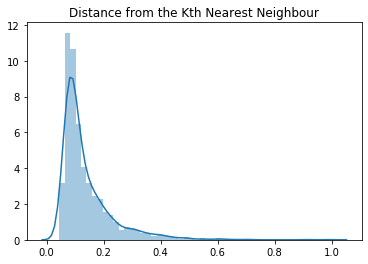

In [242]:
##Plot Outlier scoring Points for test Dataset
sns.distplot(y_test_scores)
plt.title('Distance from the Kth Nearest Neighbour')
plt.savefig('KthDistanceTestSet.png')

In [243]:
##Creating A dataframe for Train Dataset consisting of the (Outlier score + Label + Xpoints)
TrainScores = list(y_train_scores)##Outlier scores of training Dataset
XPoints = np.arange(1,len(TrainScores)+1)##X axis
CombineTrainFile = TrainY#Labels for training Dataset
CombineTrainFile['XPoints'] = XPoints##0,1,2 -------------length of training set
CombineTrainFile['TrainScores'] = TrainScores##Oulier scores

No handles with labels found to put in legend.


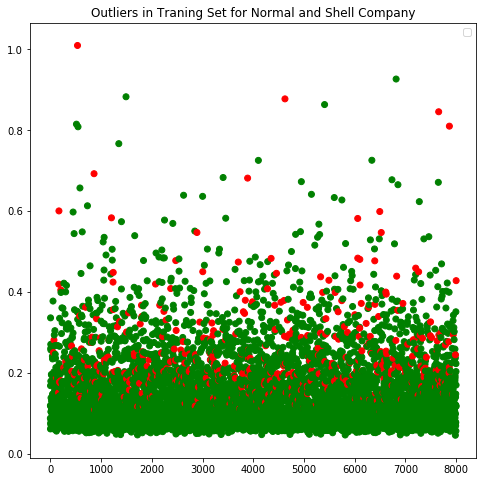

In [244]:
##Plot Scatter Plot for the Local Outlier Scores
colors = ['green','red']
fig = plt.figure(figsize=(8,8))
plt.scatter(CombineTrainFile['XPoints'],CombineTrainFile['TrainScores'], c=CombineTrainFile['Flag'],cmap=matplotlib.colors.ListedColormap(colors))
plt.title('Outliers in Traning Set for Normal and Shell Company')
plt.legend()

No handles with labels found to put in legend.


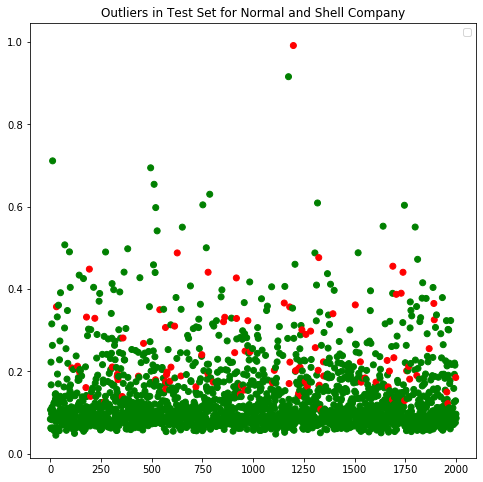

In [245]:
##Creating A dataframe for est Dataset consisting of the (Outlier score + Label + Xpoints)
TestScores = list(y_test_scores)##Outlier scores of training Dataset
XPoints = np.arange(1,len(TestScores)+1)##X axis
CombineTestFile = TestY#Labels for training Dataset
CombineTestFile['XPoints'] = XPoints##0,1,2 -------------length of training set
CombineTestFile['TestScores'] = TestScores##Oulier scores
##Plot Scatter Plot for the Local Outlier Scores
colors = ['green','red']
fig = plt.figure(figsize=(8,8))
plt.scatter(CombineTestFile['XPoints'],CombineTestFile['TestScores'], c=CombineTestFile['Flag'],cmap=matplotlib.colors.ListedColormap(colors))
plt.title('Outliers in Test Set for Normal and Shell Company')
plt.legend()

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 0.8855
Final F-score on the testing data: 0.2543
precision_score 0.18
recall_score 0.3564356435643564
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.8890
Final F-score on the testing data: 0.2438
precision_score 0.171875
recall_score 0.34375
Confusion matrix for test dataset
[[1745  159]
 [  63   33]]
Auc Score is :  0.6301207983193278


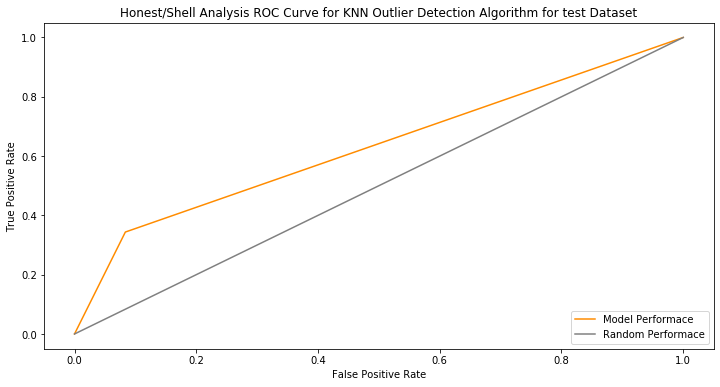

In [246]:
###Check the Accuracy of the KNN model
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(CopyTrainY,y_train_pred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(CopyTrainY,y_train_pred,beta = 1.2)))
print('precision_score',precision_score(CopyTrainY,y_train_pred))
print('recall_score',recall_score(CopyTrainY,y_train_pred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(CopyTestY,y_test_pred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(CopyTestY,y_test_pred,beta = 1.2)))
print('precision_score',precision_score(CopyTestY,y_test_pred))
print('recall_score',recall_score(CopyTestY,y_test_pred))
cm = confusion_matrix(CopyTestY,y_test_pred,labels = [0,1])
print("Confusion matrix for test dataset")
print(cm)
fpr, tpr, thresholds = roc_curve(CopyTestY,y_test_pred)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for KNN Outlier Detection Algorithm for test Dataset')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(CopyTestY,y_test_pred))

# Type of the Company

In [73]:
CompanyDataN = pd.read_csv('CompanyData_N.csv')

In [74]:
CompanyDataS = pd.read_csv('CompanyData_S.csv')

In [75]:
CombineCompany = pd.concat([CompanyDataN,CompanyDataS], axis=0) 

In [76]:
CombineCompany.head(2)

AccountNumber      TypeBusiness BusinessCategory RevenueSize BusinessSize  \
0         100001  Equipment Hiring             Bulk        HIGH       MEDIUM   
1         100002     Manufacturing             Bulk         LOW        SMALL   

   TotalEmployees  Annual_Revenue  TotalQwners QwnerHistory CompanyLocation  \
0              92       541235428            7           NO           INDIA   
1               1          646165            7           NO           INDIA   

  TaxHavenLocation  NumberOfAccounts  ExpenditureAmount  AnnualProfit  \
0                0                 1        243555942.6     297679485   
1                0                 1           180926.2        465238   

  AccountType  PercentageExpenditure Flag  
0     Current              45.041396    N  
1     Current              28.110429    N

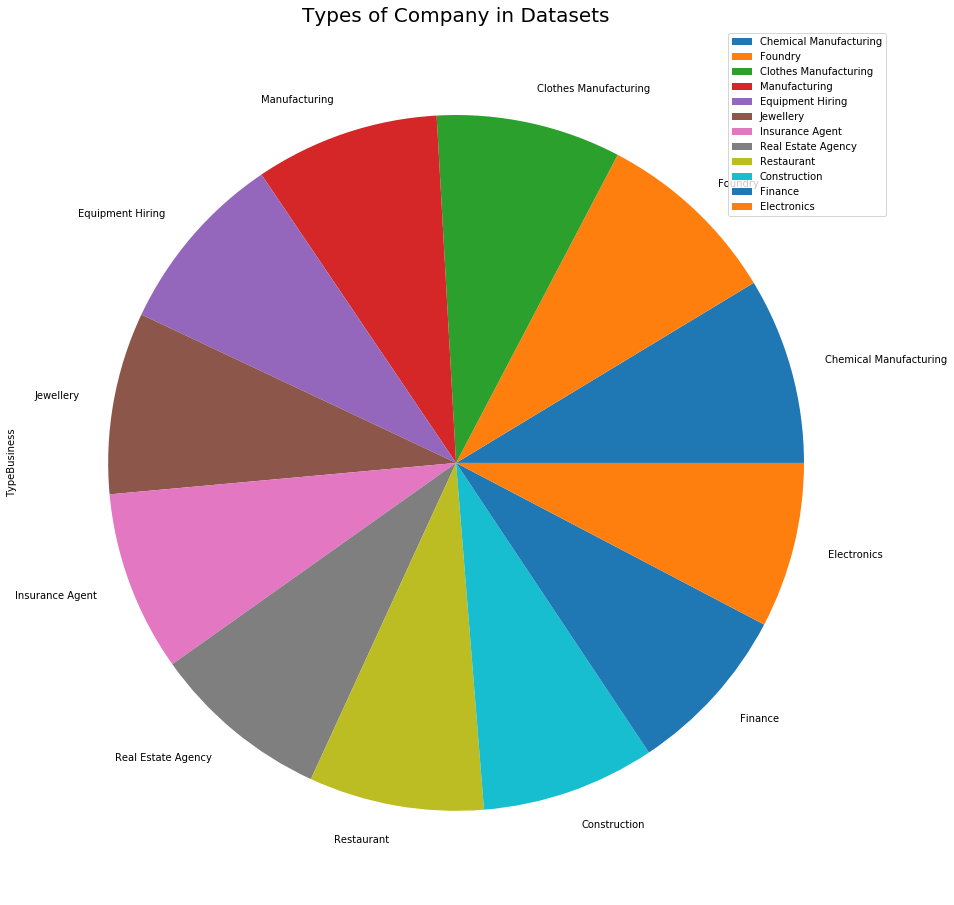

In [80]:
plt.figure(figsize=(16,16))
CombineCompany.TypeBusiness.value_counts().plot(kind='pie')
plt.title('Types of Company in Datasets',fontsize = 20)
plt.savefig('Company.png')
plt.legend()

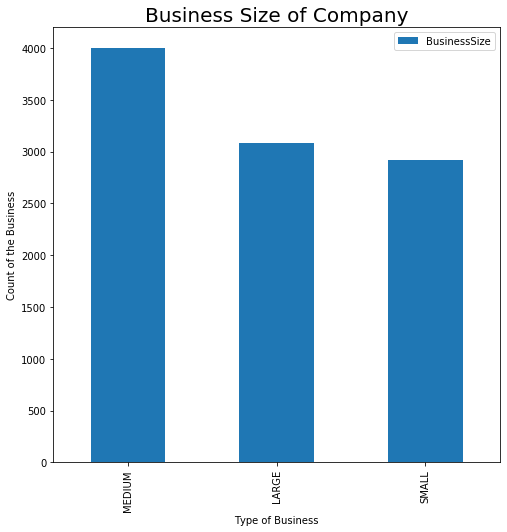

In [79]:
plt.figure(figsize=(8,8))
CombineCompany.BusinessSize.value_counts().plot(kind='bar')
plt.title('Business Size of Company',fontsize = 20)
plt.xlabel('Type of Business')
plt.ylabel('Count of the Business')
plt.savefig('TypesOfCompany.png')
plt.legend()

# Use ABOD outlier detection Algorithm

In [253]:
from pyod.models.abod import ABOD 

In [254]:
SummarizedData_copy = SummarizedData.copy()
X = SummarizedData_copy[['AnnualExpenditure','TaxHaven','ClientToIncomingRatio','OutgoingTransPercentage','IncomingTransLargeAmount','AnnualExpenditure','AvgIncomingCount','TypeAccount','LargeAmoutOutgoingTrans','SmallAmountOutgoingTrans','IncomingCashTransaction','IncomingTransPercentage','AvgIncomingAmount','AvgTransPerClient','AnnualRevenue','Foreign']]
Y = SummarizedData_copy.iloc[:, SummarizedData_copy.columns == 'Flag']
scaler = MinMaxScaler() 
rescaledX = scaler.fit_transform(X)
TrainX,TestX,TrainY,TestY = train_test_split(rescaledX,Y,test_size = 0.3, random_state = 0)
##Copy Variabel for Accuracy Analysis
CopyTrainY = TrainY.copy()
CopyTestY = TestY.copy()
##Applying KNN algorith,
clf = ABOD(n_neighbors=7,contamination=0.1,method='fast')
clf.fit(TrainX)

ABOD(contamination=0.1, method='fast', n_neighbors=7)

In [255]:
##Predicting Label for training Dataset
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
##Outlier Scores for training Data Points
y_train_scores = clf.decision_scores_  # raw outlier scores
##Predicting Label for Test Dataset
y_test_pred = clf.predict(TestX)  # outlier labels (0 or 1)
##Outlier scores for test dataset
y_test_scores = clf.decision_function(TestX)  # outlier scores
##Plot Outlier scoring Points for training Dataset

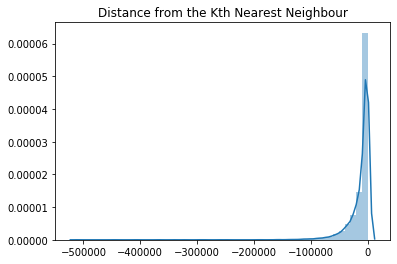

In [256]:
##Plot Outlier scoring Points for training Dataset
sns.distplot(y_train_scores)
plt.title('Distance from the Kth Nearest Neighbour')
plt.savefig('KthDistanceTrainingSet.png')

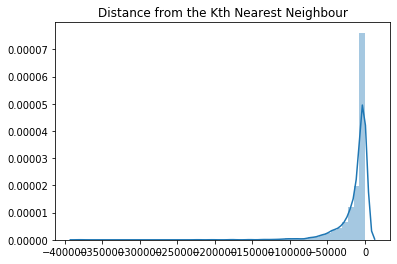

In [257]:
##Plot Outlier scoring Points for test Dataset
sns.distplot(y_test_scores)
plt.title('Distance from the Kth Nearest Neighbour')
plt.savefig('KthDistanceTestSet.png')

No handles with labels found to put in legend.


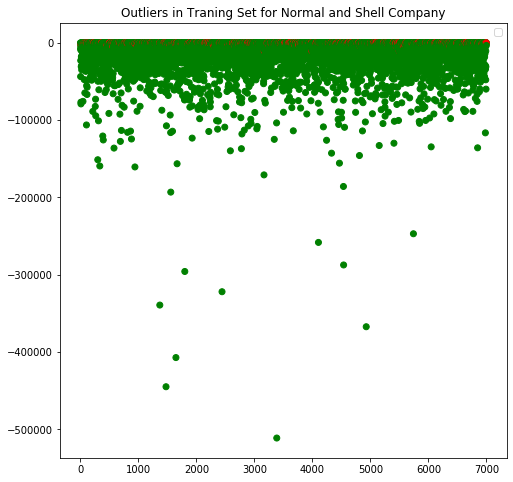

In [258]:
##Creating A dataframe for Train Dataset consisting of the (Outlier score + Label + Xpoints)
TrainScores = list(y_train_scores)##Outlier scores of training Dataset
XPoints = np.arange(1,len(TrainScores)+1)##X axis
CombineTrainFile = TrainY#Labels for training Dataset
CombineTrainFile['XPoints'] = XPoints##0,1,2 -------------length of training set
CombineTrainFile['TrainScores'] = TrainScores##Oulier scores
##Plot Scatter Plot for the Local Outlier Scores
colors = ['green','red']
fig = plt.figure(figsize=(8,8))
plt.scatter(CombineTrainFile['XPoints'],CombineTrainFile['TrainScores'], c=CombineTrainFile['Flag'],cmap=matplotlib.colors.ListedColormap(colors))
plt.title('Outliers in Traning Set for Normal and Shell Company')
plt.legend()

No handles with labels found to put in legend.


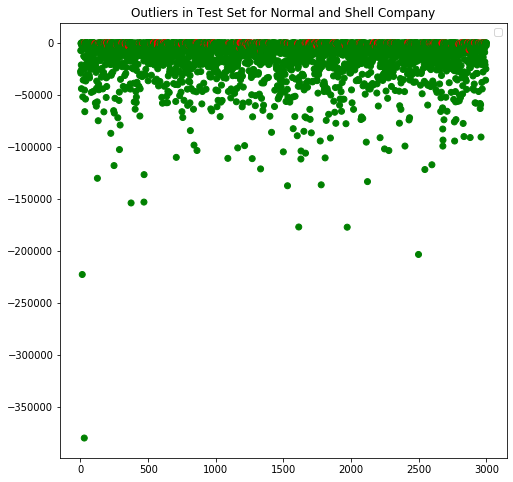

In [259]:
##Creating A dataframe for est Dataset consisting of the (Outlier score + Label + Xpoints)
TestScores = list(y_test_scores)##Outlier scores of training Dataset
XPoints = np.arange(1,len(TestScores)+1)##X axis
CombineTestFile = TestY#Labels for training Dataset
CombineTestFile['XPoints'] = XPoints##0,1,2 -------------length of training set
CombineTestFile['TestScores'] = TestScores##Oulier scores
##Plot Scatter Plot for the Local Outlier Scores
colors = ['green','red']
fig = plt.figure(figsize=(8,8))
plt.scatter(CombineTestFile['XPoints'],CombineTestFile['TestScores'], c=CombineTestFile['Flag'],cmap=matplotlib.colors.ListedColormap(colors))
plt.title('Outliers in Test Set for Normal and Shell Company')
plt.legend()

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 0.8791
Final F-score on the testing data: 0.2128
precision_score 0.15142857142857144
recall_score 0.29608938547486036
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.8933
Final F-score on the testing data: 0.2282
precision_score 0.16541353383458646
recall_score 0.30985915492957744
Confusion matrix for test dataset
[[2636  222]
 [  98   44]]
Auc Score is :  0.6160912289693374


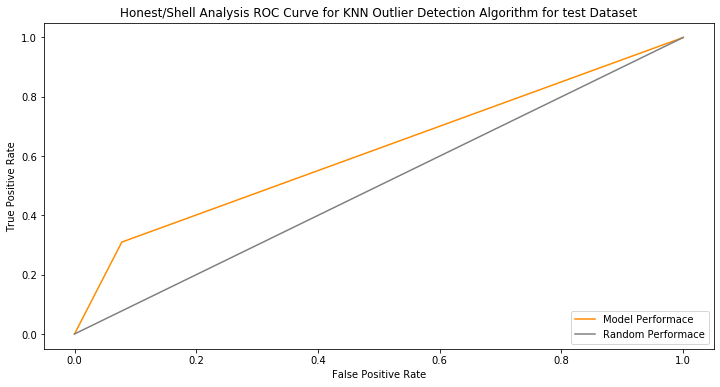

In [260]:
###Check the Accuracy of the KNN model
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(CopyTrainY,y_train_pred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(CopyTrainY,y_train_pred,beta = 1.2)))
print('precision_score',precision_score(CopyTrainY,y_train_pred))
print('recall_score',recall_score(CopyTrainY,y_train_pred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(CopyTestY,y_test_pred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(CopyTestY,y_test_pred,beta = 1.2)))
print('precision_score',precision_score(CopyTestY,y_test_pred))
print('recall_score',recall_score(CopyTestY,y_test_pred))
cm = confusion_matrix(CopyTestY,y_test_pred,labels = [0,1])
print("Confusion matrix for test dataset")
print(cm)
fpr, tpr, thresholds = roc_curve(CopyTestY,y_test_pred)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for KNN Outlier Detection Algorithm for test Dataset')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(CopyTestY,y_test_pred))


# Local Outlier Factor -- Anomaly Density

In [171]:
from pyod.models.lof import LOF

In [172]:
SummarizedData_copy = SummarizedData.copy()
X = SummarizedData_copy[['AnnualExpenditure','TaxHaven','ClientToIncomingRatio','OutgoingTransPercentage','IncomingTransLargeAmount','AnnualExpenditure','AvgIncomingCount','TypeAccount','LargeAmoutOutgoingTrans','SmallAmountOutgoingTrans','IncomingCashTransaction','IncomingTransPercentage','AvgIncomingAmount','AvgTransPerClient','AnnualRevenue','Foreign']]
Y = SummarizedData_copy.iloc[:, SummarizedData_copy.columns == 'Flag']
scaler = MinMaxScaler() 
rescaledX = scaler.fit_transform(X)
TrainX,TestX,TrainY,TestY = train_test_split(rescaledX,Y,test_size = 0.3, random_state = 0)
##Copy Variabel for Accuracy Analysis
CopyTrainY = TrainY.copy()
CopyTestY = TestY.copy()
##Applying KNN algorith,
clf = LOF(n_neighbors = 13, algorithm='kd_tree', leaf_size = 5,metric ='euclidean', p=2, metric_params=None, contamination=0.1, n_jobs=1)
clf.fit(TrainX)

LOF(algorithm='kd_tree', contamination=0.1, leaf_size=5, metric='euclidean',
  metric_params=None, n_jobs=1, n_neighbors=13, p=2)

In [173]:
##Predicting Label for training Dataset
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
##Outlier Scores for training Data Points
y_train_scores = clf.decision_scores_  # raw outlier scores
##Predicting Label for Test Dataset
y_test_pred = clf.predict(TestX)  # outlier labels (0 or 1)
##Outlier scores for test dataset
y_test_scores = clf.decision_function(TestX)  # outlier scores
##Plot Outlier scoring Points for training Dataset

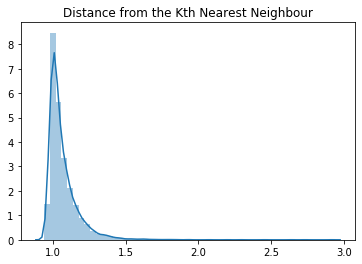

In [174]:
##Plot Outlier scoring Points for training Dataset
sns.distplot(y_train_scores)
plt.title('Distance from the Kth Nearest Neighbour')
plt.savefig('KthDistanceTrainingSet.png')

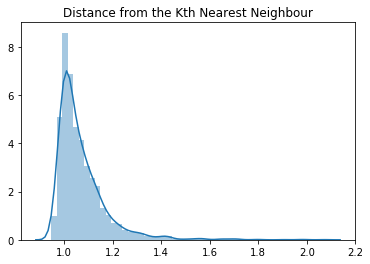

In [175]:
##Plot Outlier scoring Points for test Dataset
sns.distplot(y_test_scores)
plt.title('Distance from the Kth Nearest Neighbour')
plt.savefig('KthDistanceTestSet.png')

No handles with labels found to put in legend.


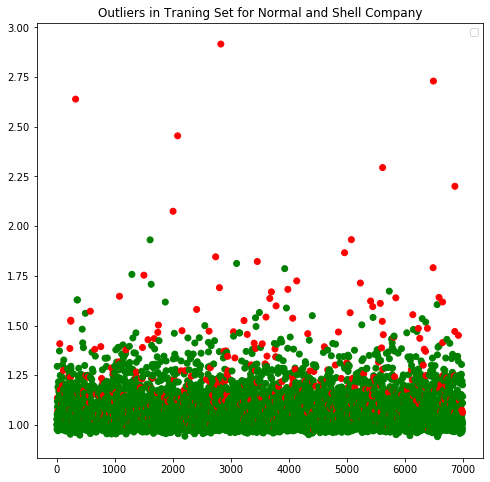

In [176]:
##Creating A dataframe for Train Dataset consisting of the (Outlier score + Label + Xpoints)
TrainScores = list(y_train_scores)##Outlier scores of training Dataset
XPoints = np.arange(1,len(TrainScores)+1)##X axis
CombineTrainFile = TrainY#Labels for training Dataset
CombineTrainFile['XPoints'] = XPoints##0,1,2 -------------length of training set
CombineTrainFile['TrainScores'] = TrainScores##Oulier scores
##Plot Scatter Plot for the Local Outlier Scores
colors = ['green','red']
fig = plt.figure(figsize=(8,8))
plt.scatter(CombineTrainFile['XPoints'],CombineTrainFile['TrainScores'], c=CombineTrainFile['Flag'],cmap=matplotlib.colors.ListedColormap(colors))
plt.title('Outliers in Traning Set for Normal and Shell Company')
plt.legend()

No handles with labels found to put in legend.


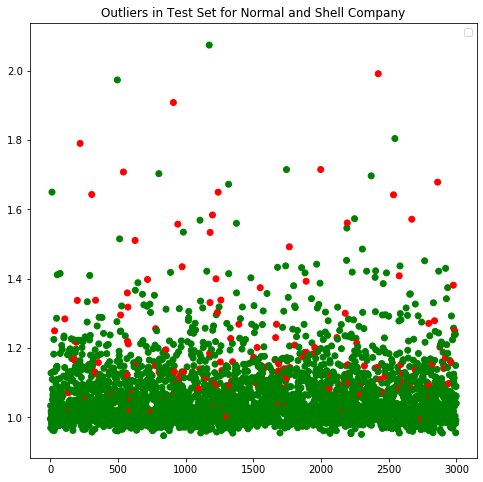

In [177]:
##Creating A dataframe for est Dataset consisting of the (Outlier score + Label + Xpoints)
TestScores = list(y_test_scores)##Outlier scores of training Dataset
XPoints = np.arange(1,len(TestScores)+1)##X axis
CombineTestFile = TestY#Labels for training Dataset
CombineTestFile['XPoints'] = XPoints##0,1,2 -------------length of training set
CombineTestFile['TestScores'] = TestScores##Oulier scores
##Plot Scatter Plot for the Local Outlier Scores
colors = ['green','red']
fig = plt.figure(figsize=(8,8))
plt.scatter(CombineTestFile['XPoints'],CombineTestFile['TestScores'], c=CombineTestFile['Flag'],cmap=matplotlib.colors.ListedColormap(colors))
plt.title('Outliers in Test Set for Normal and Shell Company')
plt.legend()

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 0.8923
Final F-score on the testing data: 0.3051
precision_score 0.21714285714285714
recall_score 0.4245810055865922
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.8960
Final F-score on the testing data: 0.2652
precision_score 0.1897810218978102
recall_score 0.36619718309859156
Confusion matrix for test dataset
[[  52   90]
 [ 222 2636]]
Auc Score is :  0.6442602430538443


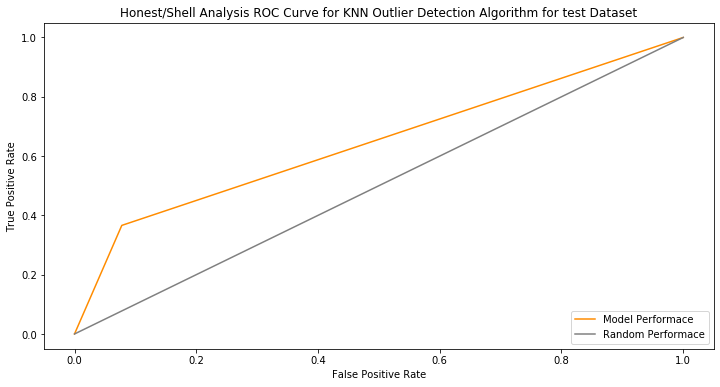

In [178]:
###Check the Accuracy of the KNN model
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(CopyTrainY,y_train_pred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(CopyTrainY,y_train_pred,beta = 1.2)))
print('precision_score',precision_score(CopyTrainY,y_train_pred))
print('recall_score',recall_score(CopyTrainY,y_train_pred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(CopyTestY,y_test_pred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(CopyTestY,y_test_pred,beta = 1.2)))
print('precision_score',precision_score(CopyTestY,y_test_pred))
print('recall_score',recall_score(CopyTestY,y_test_pred))
cm = confusion_matrix(CopyTestY,y_test_pred,labels = [1,0])
print("Confusion matrix for test dataset")
print(cm)
fpr, tpr, thresholds = roc_curve(CopyTestY,y_test_pred)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for KNN Outlier Detection Algorithm for test Dataset')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(CopyTestY,y_test_pred))

# Need To check working of Decision Tree

In [33]:
#X = SummarizedData.iloc[:, SummarizedData.columns != 'Flag']
X = SummarizedData[['AvgIncomingCount','AvgIncomingAmount','IncomingTransLargeAmount','SmallAmountOutgoingTrans','IncomingCashTransaction','Local','IncomingTransPercentage','ClientToIncomingRatio','OutgoingTransPercentage','TaxHaven']]
Y = SummarizedData.iloc[:, SummarizedData.columns == 'Flag']

In [34]:
# Whole dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  7000
Number transactions test dataset:  3000
Total number of transactions:  10000


In [35]:
from sklearn import tree
import graphviz

In [59]:

clf = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split = 2,max_depth =6,min_samples_leaf = 1,min_weight_fraction_leaf = 0)

In [60]:
grid_fit = clf.fit(X_train,Y_train)
best_predictions = best_clf.predict(X_test)
TrainPred = best_clf.predict(X_train)

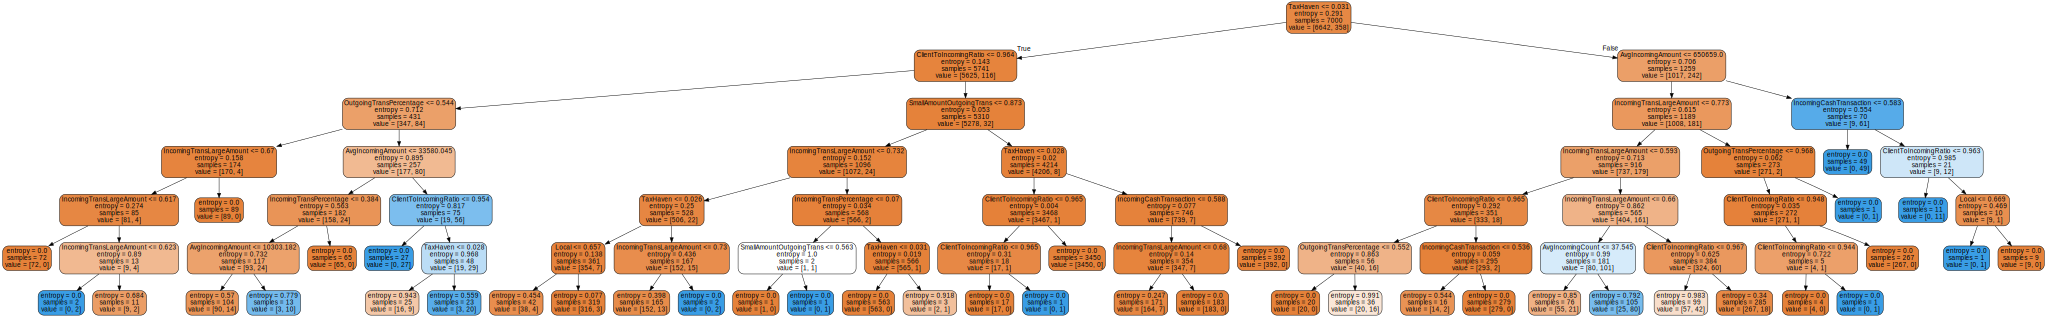

In [61]:
os.environ["PATH"] += os.pathsep + r'C:\Users\kbaja4\AppData\Local\Programs\Python\Python36\graphviz-2.38\release\bin'
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=10, feature_names=list(X_train.columns.values), filled=True, rounded=True)
valgTre = graphviz.Source(dot_data) 
png_bytes = valgTre.pipe(format='png')
with open('DecisionTree_Classifier.png','wb') as f:
    f.write(png_bytes)

#from IPython.display import Image
#Image(png_bytes)
valgTre

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the testing data: 0.9781
Final F-score on the testing data: 0.7463
precision_score 0.8360655737704918
recall_score 0.7122905027932961
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9680
Final F-score on the testing data: 0.5805
precision_score 0.7169811320754716
recall_score 0.5352112676056338
[[2828   30]
 [  66   76]]
Auc Score is :  0.7623572083304586


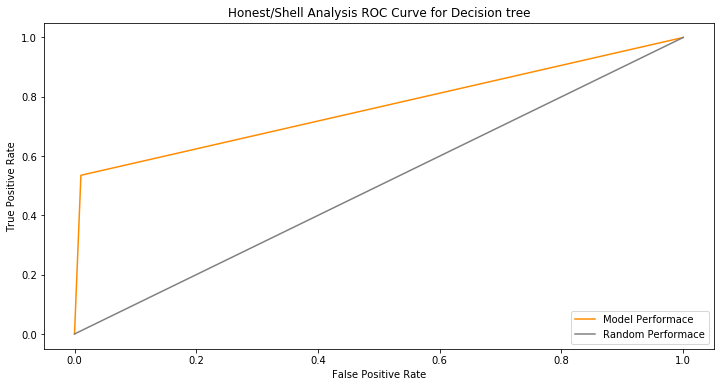

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score,f1_score
from sklearn.metrics import precision_recall_curve,fbeta_score
from sklearn.metrics import roc_curve

print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_train,TrainPred)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_train,TrainPred,beta = 1.5)))
print('precision_score',precision_score(Y_train,TrainPred))
print('recall_score',recall_score(Y_train,TrainPred))
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_test,best_predictions,beta = 1.5)))
print('precision_score',precision_score(Y_test,best_predictions))
print('recall_score',recall_score(Y_test,best_predictions))
cm = confusion_matrix(Y_test,best_predictions,labels = [0,1])
print(cm)
fpr, tpr, thresholds = roc_curve(Y_test,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(Y_test,best_predictions))

# Real World suspicious Alert

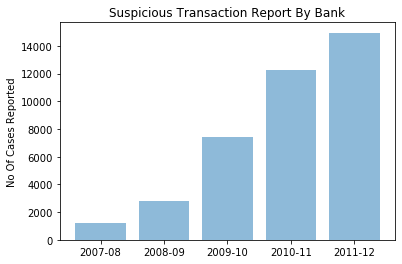

In [5]:
objects = ('2007-08','2008-09','2009-10','2010-11','2011-12')
y_pos = np.arange(len(objects))
performance = [1183,2826,7394,12287,14949]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('No Of Cases Reported')
plt.title('Suspicious Transaction Report By Bank')
plt.show()

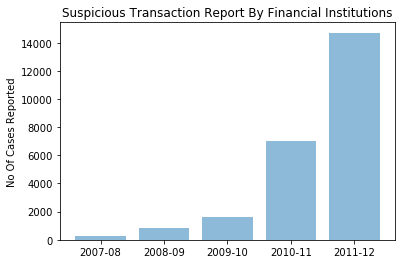

In [6]:
objects = ('2007-08','2008-09','2009-10','2010-11','2011-12')
y_pos = np.arange(len(objects))
performance = [288,841,1655,7006,14712]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('No Of Cases Reported')
plt.title('Suspicious Transaction Report By Financial Institutions')
plt.show()

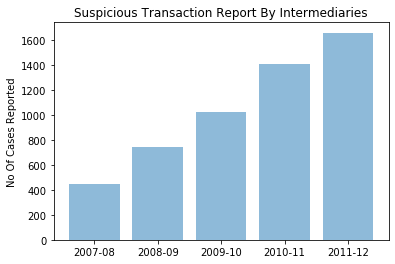

In [7]:
objects = ('2007-08','2008-09','2009-10','2010-11','2011-12')
y_pos = np.arange(len(objects))
performance = [445,742,1018,1405,1656]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('No Of Cases Reported')
plt.title('Suspicious Transaction Report By Intermediaries')
plt.show()

In [17]:
SuspiciousData = pd.read_csv('Suspicious_Transaction_Reports2012.csv')

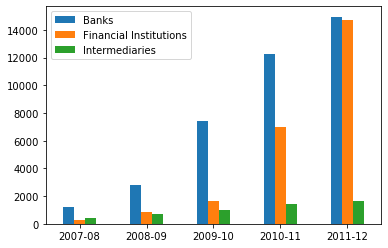

In [24]:
Banks = [1183,2826,7394,12287,14949]
FinancialInstitutions = [288,841,1655,7006,14712]
Intermediaries = [445,742,1018,1405,1656]
index = ['2007-08', '2008-09', '2009-10','2010-11', '2011-12']
df = pd.DataFrame({'Banks': Banks,'Financial Institutions': FinancialInstitutions,'Intermediaries':Intermediaries}, index=index)
ax = df.plot.bar(rot=0) 

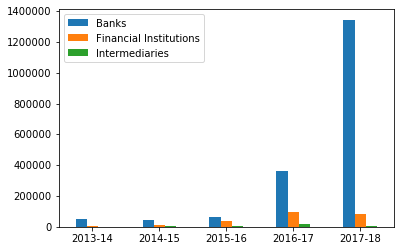

In [28]:
Banks = [51765,45858,61361,361215,1343720]
FinancialInstitutions = [8321,10649,40033,94837,84781]
Intermediaries = [1867,2139,4579,16954,7839]
index = ['2013-14', '2014-15', '2015-16','2016-17', '2017-18']
df = pd.DataFrame({'Banks': Banks,'Financial Institutions': FinancialInstitutions,'Intermediaries':Intermediaries}, index=index)
ax = df.plot.bar(rot=0) 
